# Credit card default prediction

#### Dataset source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

### Problem statement
#### Business Objective
Estimate the probability that a credit card client will default on their payment in the next month, enabling risk teams to make decisions such as adjusting credit limits, prioritizing collections, or setting monitoring strategies to reduce expected loss.

##### Target Variable
The target variable is "**default.payment.next.month**", which indicates whether a client will default on their credit card payment in the next month. It is a binary variable where 1 indicates default and 0 indicates no default.

##### Input data
- **Dataset size**: 30,000 clients from a Taiwanese bank (UCI/Kaggle dataset).
- **Features**:  23, excluding ID and target variable.
1. **Client demographics** (SEX, EDUCATION, MARRIAGE, AGE).
    - **SEX**: 1 = Male, 2 = Female
    - **EDUCATION**: 1 = Graduate School, 2 = University, 3 = High School, 4 = Others
    - **MARRIAGE**: 1 = Married, 2 = Single, 3 = Others
2. **Financial standing** (LIMIT_BAL).
3. **History of past payments** (PAY_0, PAY_2 to PAY_6). The repayment status is on a scale from -2 to 9, where:
    - -2: No consumption
    - -1: Paid in full
    - 0: The use of revolving credit (paid minimum due)
    - 1-9: Payment delay for 1-9 months or more
4. **Bill statement amounts** (BILL_AMT1 to BILL_AMT6).
5. **Previous payment amounts** (PAY_AMT1 to PAY_AMT6).

##### Output
Calibrated probability of default within the next month per client.







# Data understanding
To understand the dataset, I would take the following steps:

- **Load the data**: Read the UCI_Credit_Card.csv file into a pandas DataFrame.
- **Initial Exploration**: Examine the first few rows, column names, and data types.
- **Meaningful names** for columns
- **Missing Values**: Check for missing values in each column to identify data quality issues.
- **Target Variable Analysis**: Analyze the distribution of the 'default.payment.next.month' column to spot outliers or skewness.

- **Feature Analysis**:
1. **For categorical features**, I'll examine the unique values and their frequencies.
2. **For numerical features**, I'll look at their distributions using histograms.


In [52]:
from turtledemo.sorting_animate import randomize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/UCI_Credit_Card.csv')
# Examine the first few rows, column names, and data types
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [53]:
# Examine column names, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [54]:
# Total number of rows and columns
data.shape

(30000, 25)

In [55]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [56]:
# Rename columns to be more descriptive
data.rename(columns={
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sept',
    'PAY_2': 'Repayment_Status_Aug',
    'PAY_3': 'Repayment_Status_Jul',
    'PAY_4': 'Repayment_Status_Jun',
    'PAY_5': 'Repayment_Status_May',
    'PAY_6': 'Repayment_Status_Apr',
    'BILL_AMT1': 'Bill_Amount_Sept',
    'BILL_AMT2': 'Bill_Amount_Aug',
    'BILL_AMT3': 'Bill_Amount_Jul',
    'BILL_AMT4': 'Bill_Amount_Jun',
    'BILL_AMT5': 'Bill_Amount_May',
    'BILL_AMT6': 'Bill_Amount_Apr',
    'PAY_AMT1': 'Previous_Payment_Sept',
    'PAY_AMT2': 'Previous_Payment_Aug',
    'PAY_AMT3': 'Previous_Payment_Jul',
    'PAY_AMT4': 'Previous_Payment_Jun',
    'PAY_AMT5': 'Previous_Payment_May',
    'PAY_AMT6': 'Previous_Payment_Apr',
    'default.payment.next.month': 'Default_Payment'
}, inplace=True)

# Display the first 5 rows with new column names
data.head()

,ID,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [57]:
# check datatypes
data.dtypes

ID                         int64
Credit_Limit             float64
Gender                     int64
Education                  int64
Marital_Status             int64
Age                        int64
Repayment_Status_Sept      int64
Repayment_Status_Aug       int64
Repayment_Status_Jul       int64
Repayment_Status_Jun       int64
Repayment_Status_May       int64
Repayment_Status_Apr       int64
Bill_Amount_Sept         float64
Bill_Amount_Aug          float64
Bill_Amount_Jul          float64
Bill_Amount_Jun          float64
Bill_Amount_May          float64
Bill_Amount_Apr          float64
Previous_Payment_Sept    float64
Previous_Payment_Aug     float64
Previous_Payment_Jul     float64
Previous_Payment_Jun     float64
Previous_Payment_May     float64
Previous_Payment_Apr     float64
Default_Payment            int64
dtype: object

In [58]:
# Analyze the distribution of the target variable
default_counts = data['Default_Payment'].value_counts()
print(default_counts)

Default_Payment
0    23364
1     6636
Name: count, dtype: int64


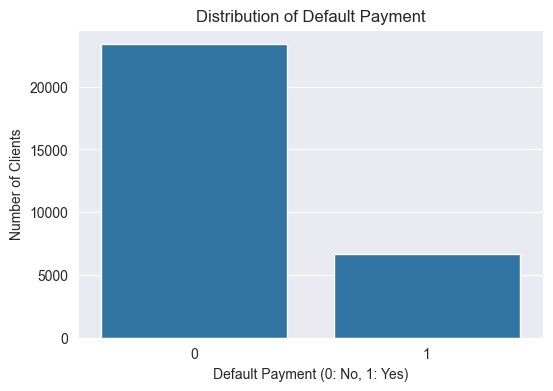

In [59]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default_Payment', data=data)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (0: No, 1: Yes)')
plt.ylabel('Number of Clients')
plt.show()

# Data preparation
After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.
- Drop ID column as it is not needed for prediction.
- For Education, 1=graduate school, 2=university, 3=high school, 4=others. Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
- For Marital Status, 1=married, 2=single, 3=others. The value 0 is not documented and can be grouped into 'others' (3).
- Rename the column titles for readability
- Verify the unique values after cleaning.
- Save the cleaned data to a new CSV file(credit_card_cleaned.csv).
- Load the cleaned data to verify null values, number of columns and rows.

In [60]:
# Drop the ID column as it is not needed for prediction
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

In [61]:
# The dataset description indicates that for Education, 1=graduate school, 2=university, 3=high school, 4=others.
# Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
data['Education'] = data['Education'].replace([0, 5, 6], 4)

In [62]:
# For Marital Status, 1=married, 2=single, 3=others.
# The value 0 is not documented and can be grouped into 'others' (3).
data['Marital_Status'] = data['Marital_Status'].replace(0, 3)

In [63]:
# Verify the unique values after cleaning
print("Unique values in 'Education' after cleaning:", sorted(data['Education'].unique()))
print("Unique values in 'Marital_Status' after cleaning:", sorted(data['Marital_Status'].unique()))

Unique values in 'Education' after cleaning: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique values in 'Marital_Status' after cleaning: [np.int64(1), np.int64(2), np.int64(3)]


In [64]:
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [65]:
# Save the cleaned data to a new CSV file
data.to_csv('data/credit_card_cleaned.csv', index=False)

print("Cleaned data saved to 'credit_card_cleaned.csv'")

Cleaned data saved to 'credit_card_cleaned.csv'


In [66]:
data = pd.read_csv('data/credit_card_cleaned.csv')
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [67]:
# Total number of rows and columns
data.shape

(30000, 24)

In [68]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

Credit_Limit             0
Gender                   0
Education                0
Marital_Status           0
Age                      0
Repayment_Status_Sept    0
Repayment_Status_Aug     0
Repayment_Status_Jul     0
Repayment_Status_Jun     0
Repayment_Status_May     0
Repayment_Status_Apr     0
Bill_Amount_Sept         0
Bill_Amount_Aug          0
Bill_Amount_Jul          0
Bill_Amount_Jun          0
Bill_Amount_May          0
Bill_Amount_Apr          0
Previous_Payment_Sept    0
Previous_Payment_Aug     0
Previous_Payment_Jul     0
Previous_Payment_Jun     0
Previous_Payment_May     0
Previous_Payment_Apr     0
Default_Payment          0
dtype: int64

# Exploratory Data Analysis (EDA)
Now that the data is cleaned, let's visualize some of the features.

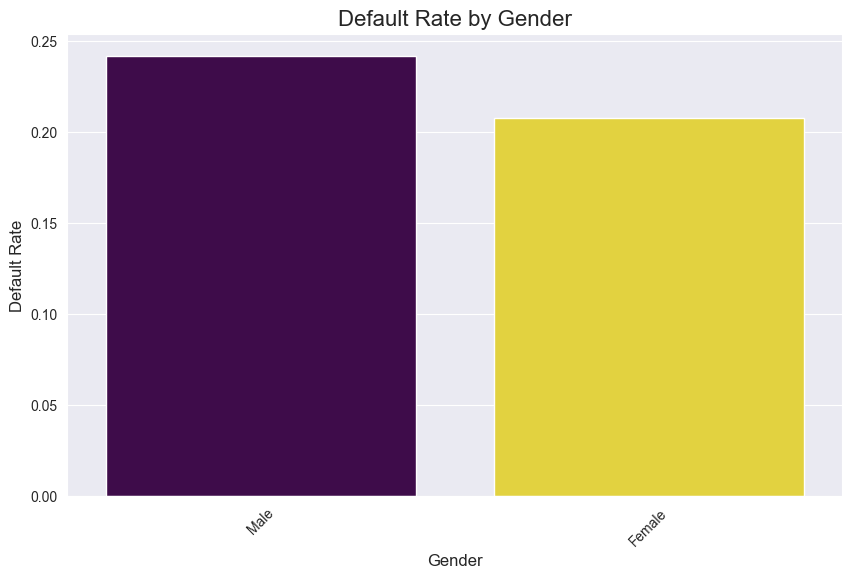

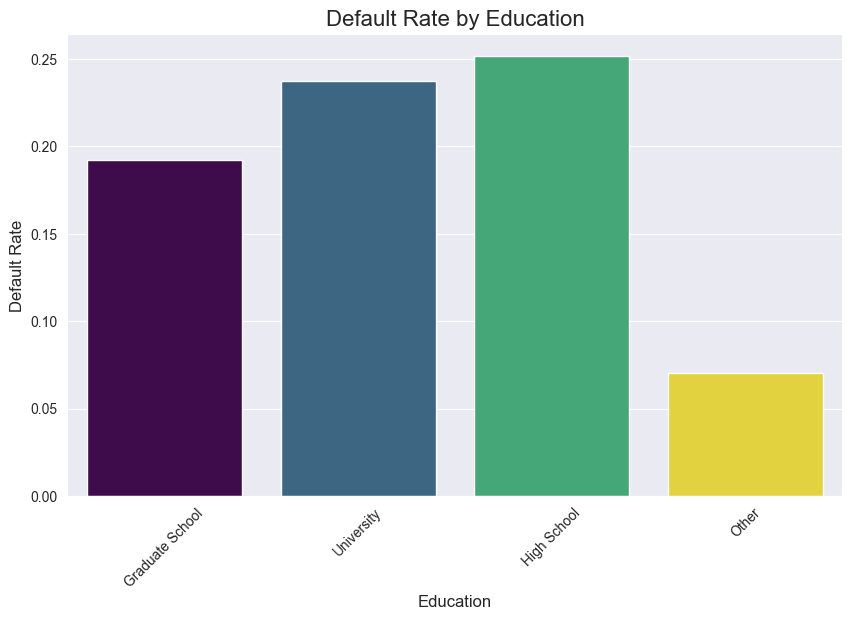

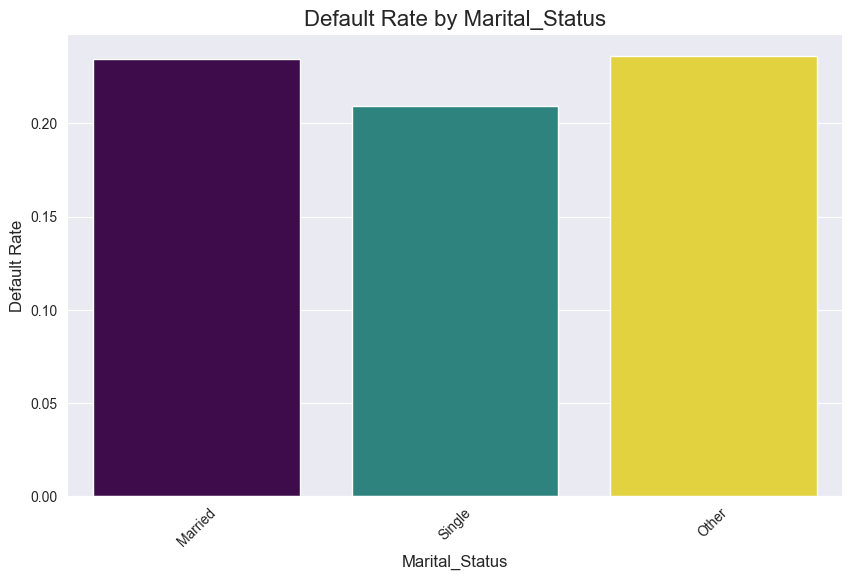

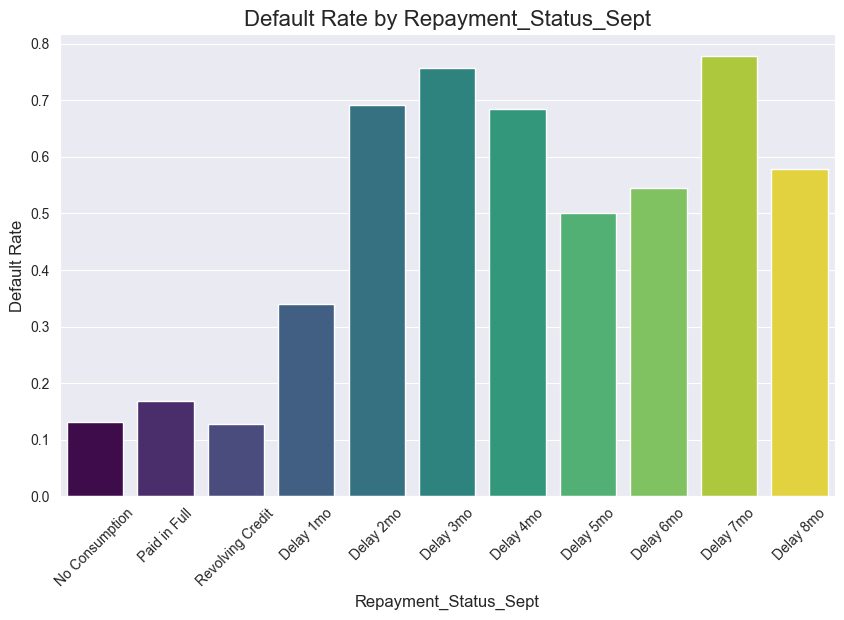

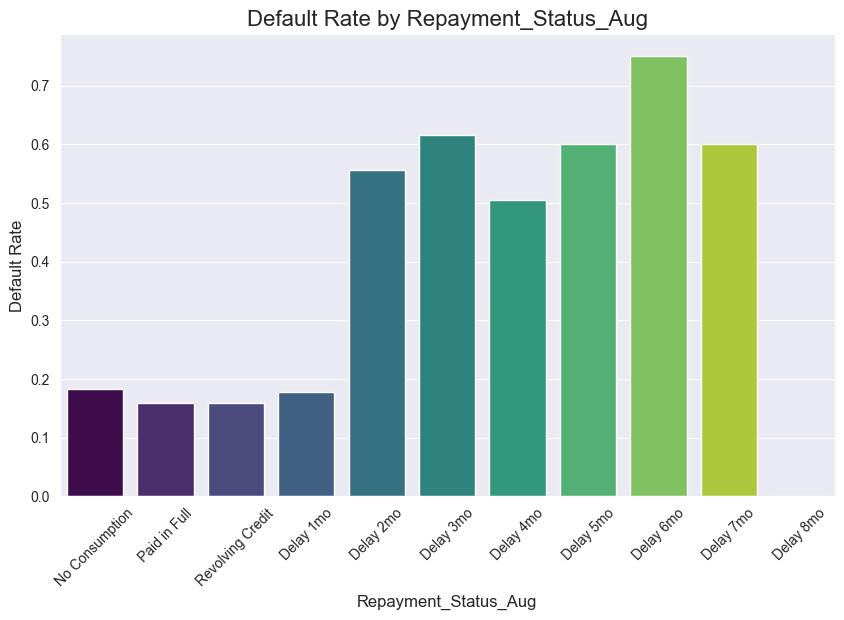

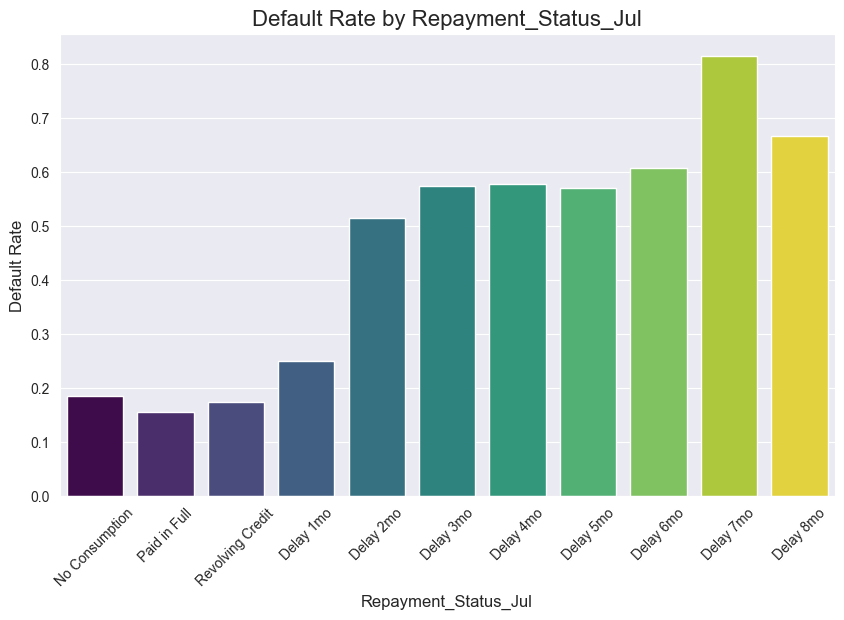

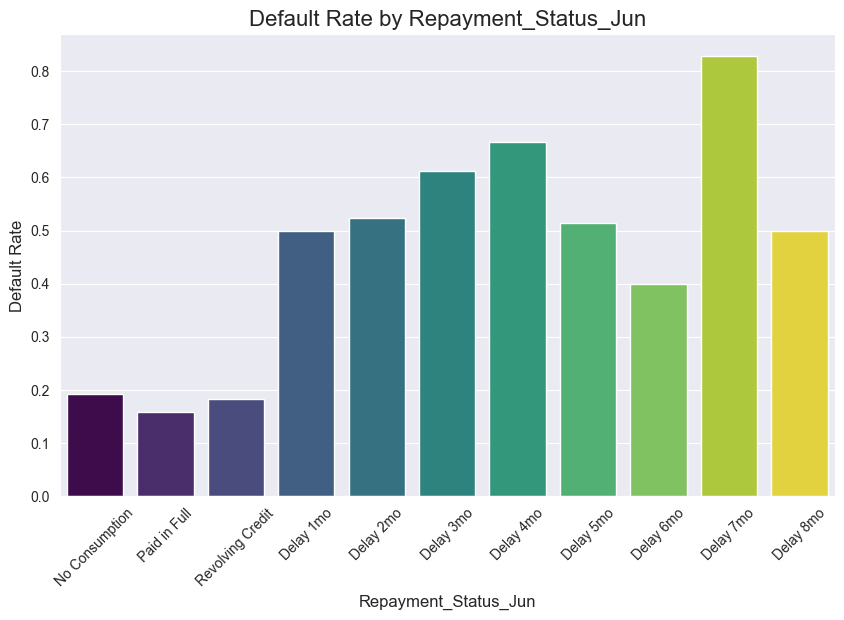

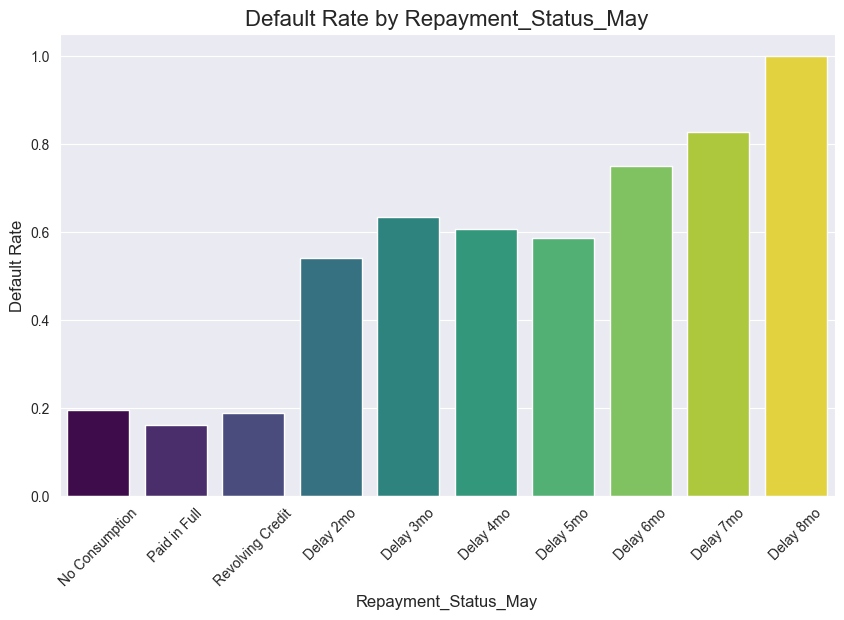

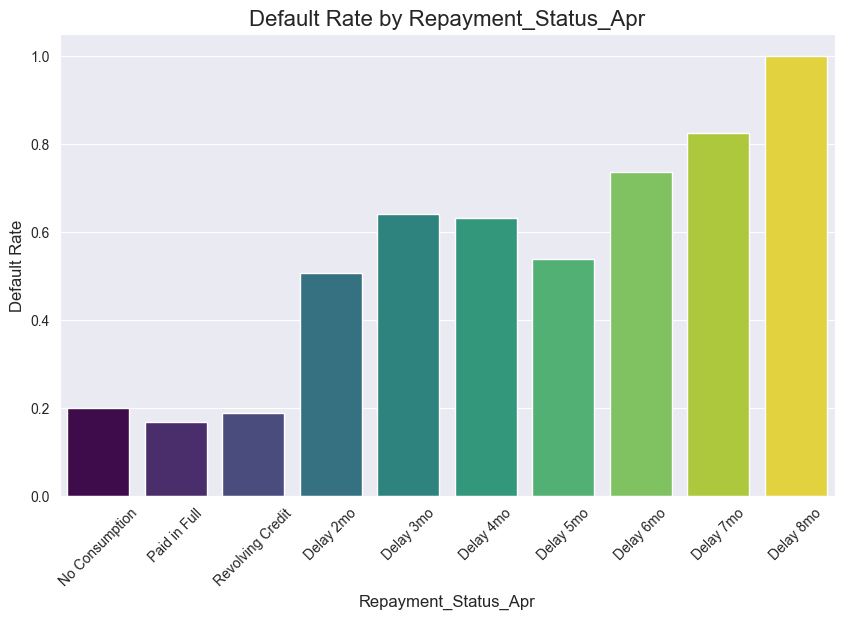

In [69]:
# Bar plots for categorical features vs. Default_Payment

# Define mappings for categorical features
gender_map = {1: 'Male', 2: 'Female'}
education_map = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Other'}
marital_map = {1: 'Married', 2: 'Single', 3: 'Other'}
repayment_map = {
    -2: 'No Consumption', -1: 'Paid in Full', 0: 'Revolving Credit', 1: 'Delay 1mo',
    2: 'Delay 2mo', 3: 'Delay 3mo', 4: 'Delay 4mo', 5: 'Delay 5mo',
    6: 'Delay 6mo', 7: 'Delay 7mo', 8: 'Delay 8mo', 9: 'Delay >8mo'
}

# Define categorical features
categorical_features = ['Gender', 'Education', 'Marital_Status'] + [col for col in data.columns if 'Repayment_Status' in col]

# Plotting
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Group by the feature and calculate the mean of Default_Payment (which is the default rate)
    default_rate = data.groupby(feature, observed=False)['Default_Payment'].mean()

    # Create a bar plot
    ax = sns.barplot(x=default_rate.index, y=default_rate.values, hue=default_rate.index, palette='viridis', legend=False)

    # Get current ticks and then set them with labels
    ticks = ax.get_xticks()

    # Set text labels for x-axis
    if feature == 'Gender':
        ax.set_xticks(ticks)
        ax.set_xticklabels([gender_map.get(x, x) for x in default_rate.index])
    elif feature == 'Education':
        ax.set_xticks(ticks)
        ax.set_xticklabels([education_map.get(x, x) for x in default_rate.index])
    elif feature == 'Marital_Status':
        ax.set_xticks(ticks)
        ax.set_xticklabels([marital_map.get(x, x) for x in default_rate.index])
    elif 'Repayment_Status' in feature:
        ax.set_xticks(ticks)
        ax.set_xticklabels([repayment_map.get(x, x) for x in default_rate.index])

    # Add labels and title
    plt.title(f'Default Rate by {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Default Rate', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

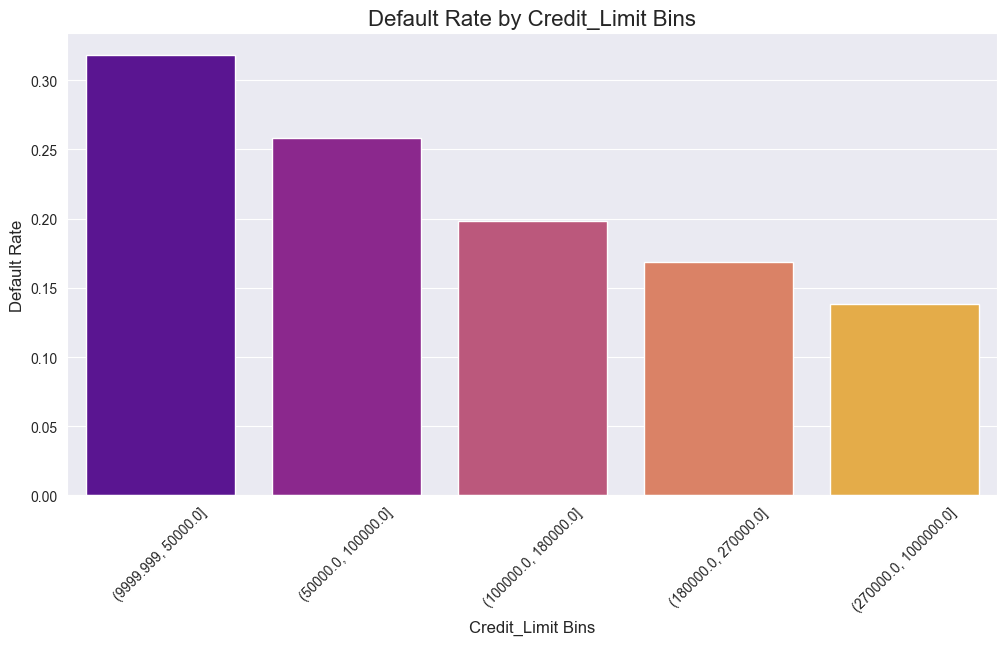

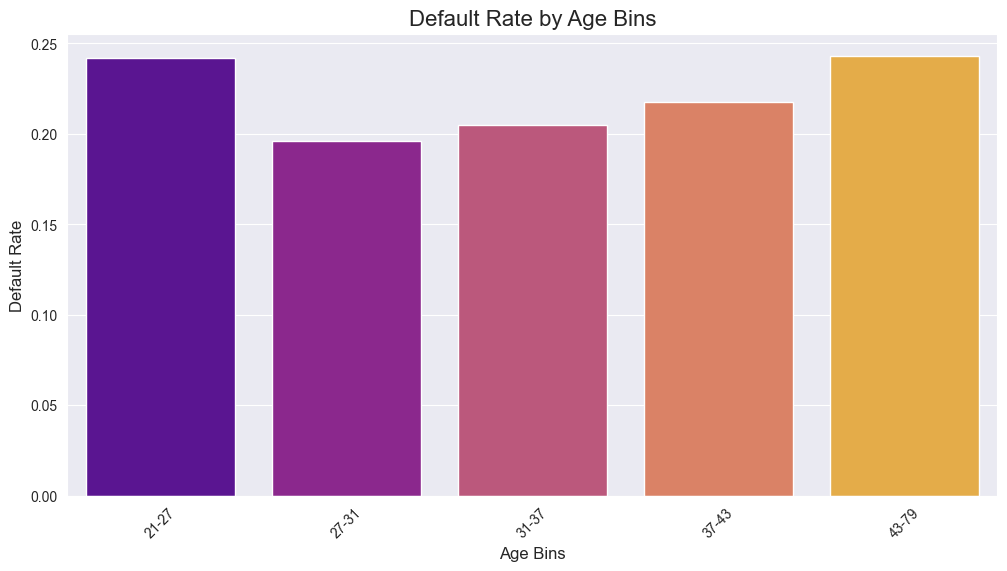

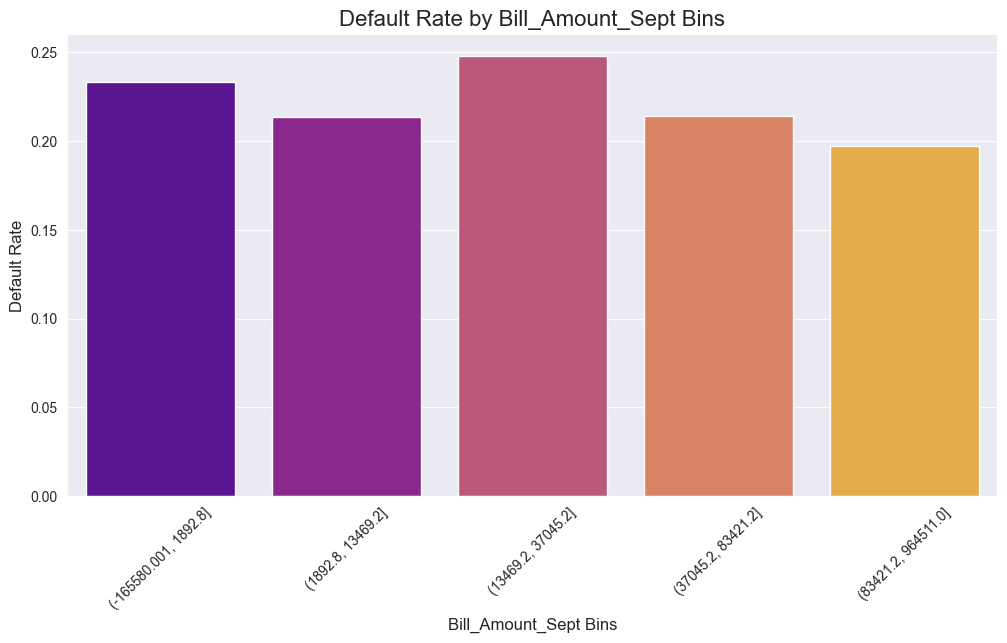

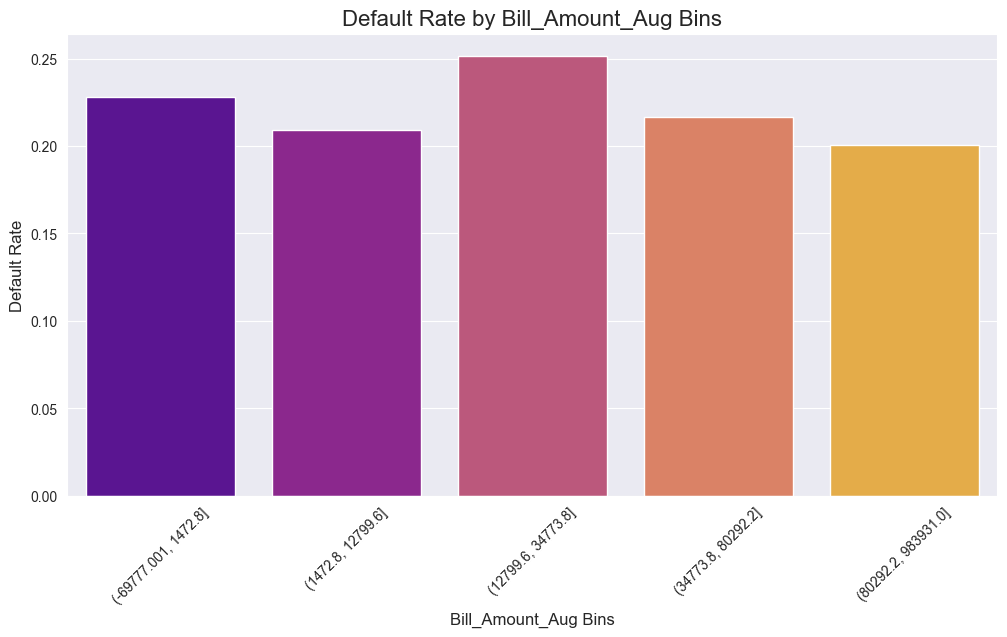

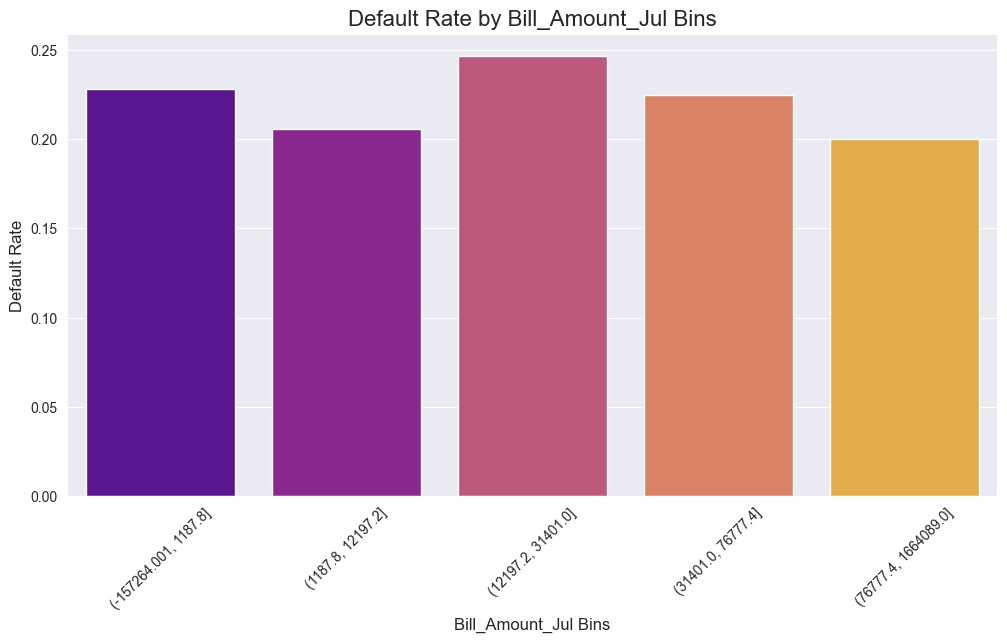

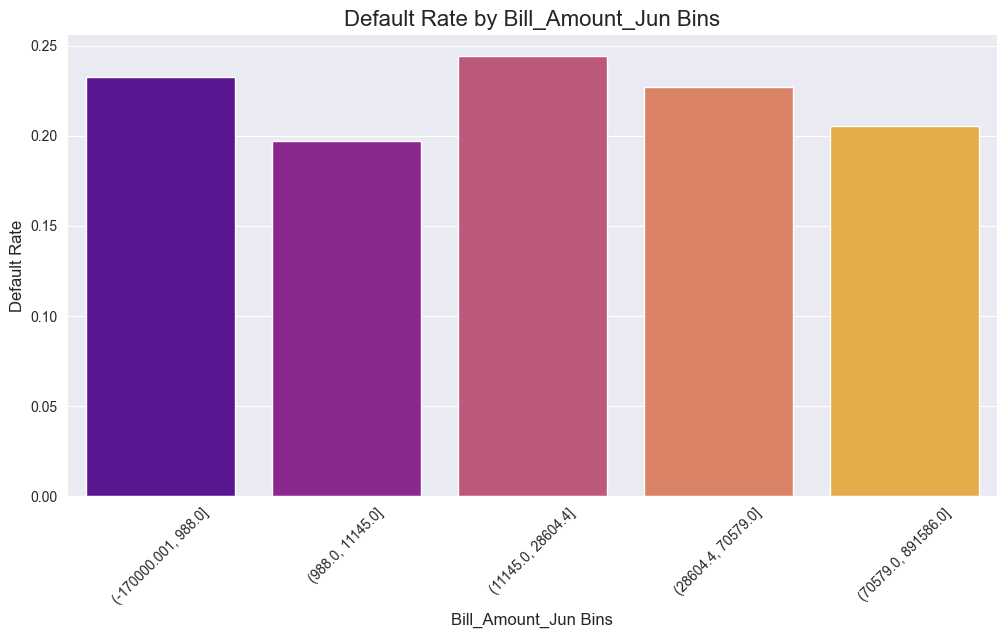

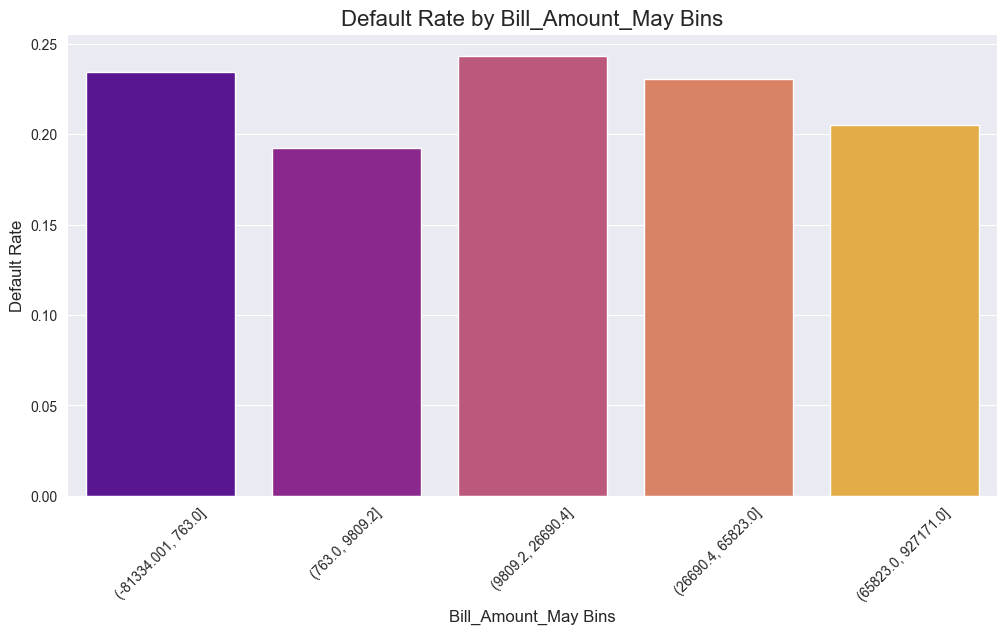

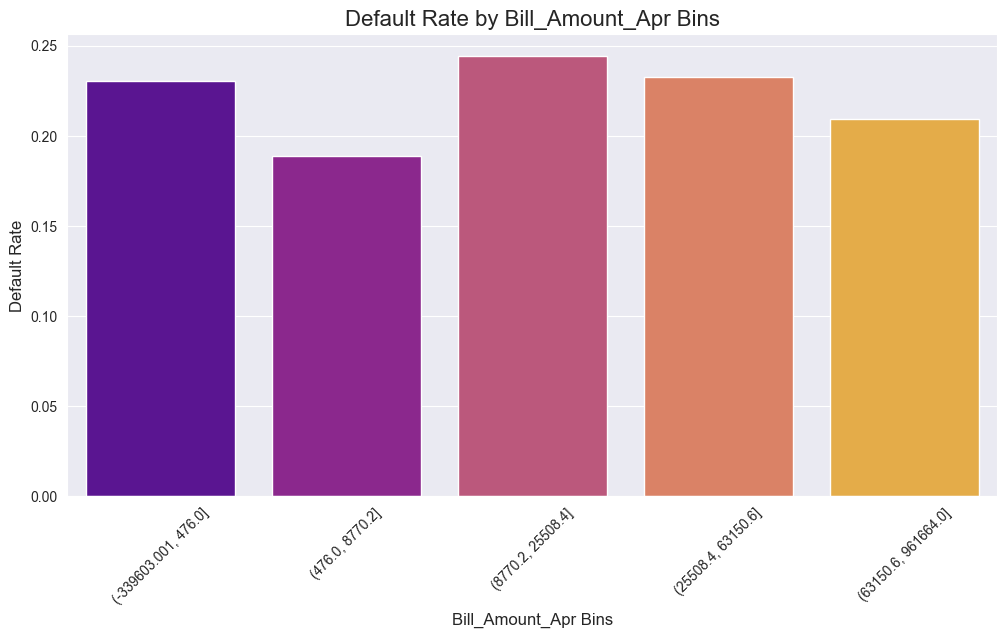

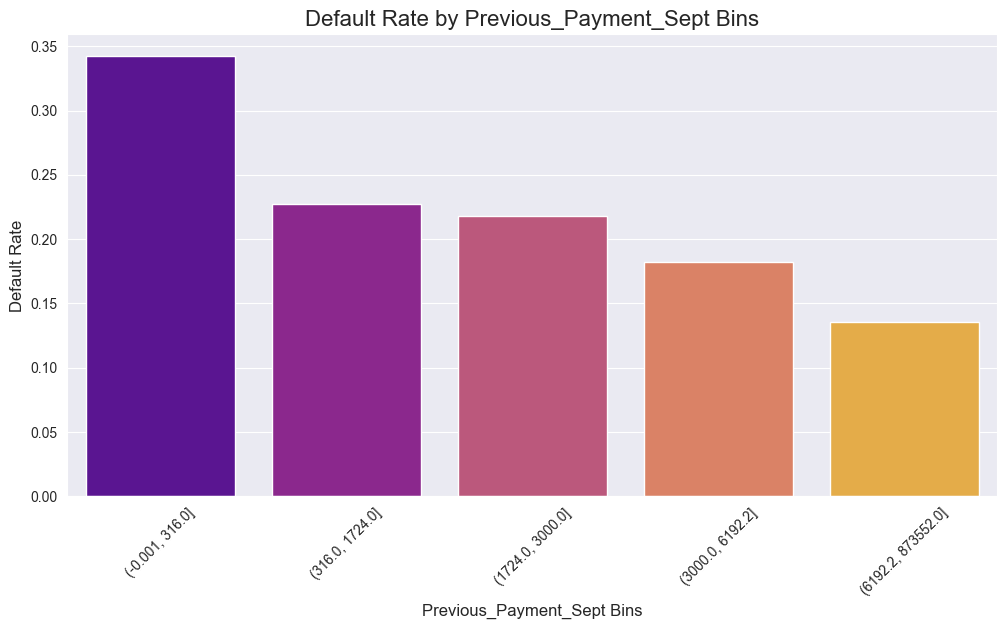

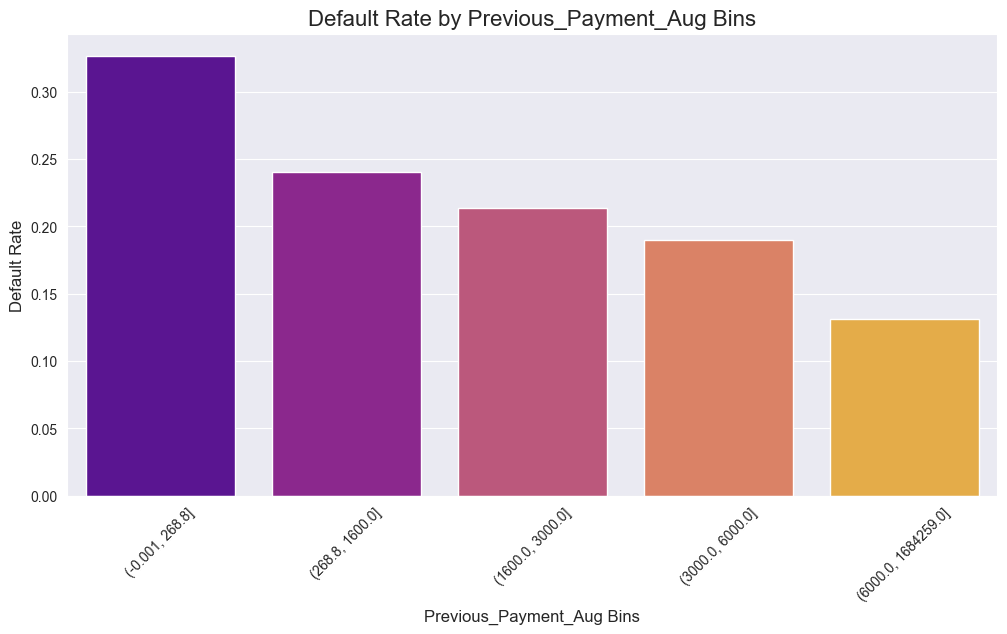

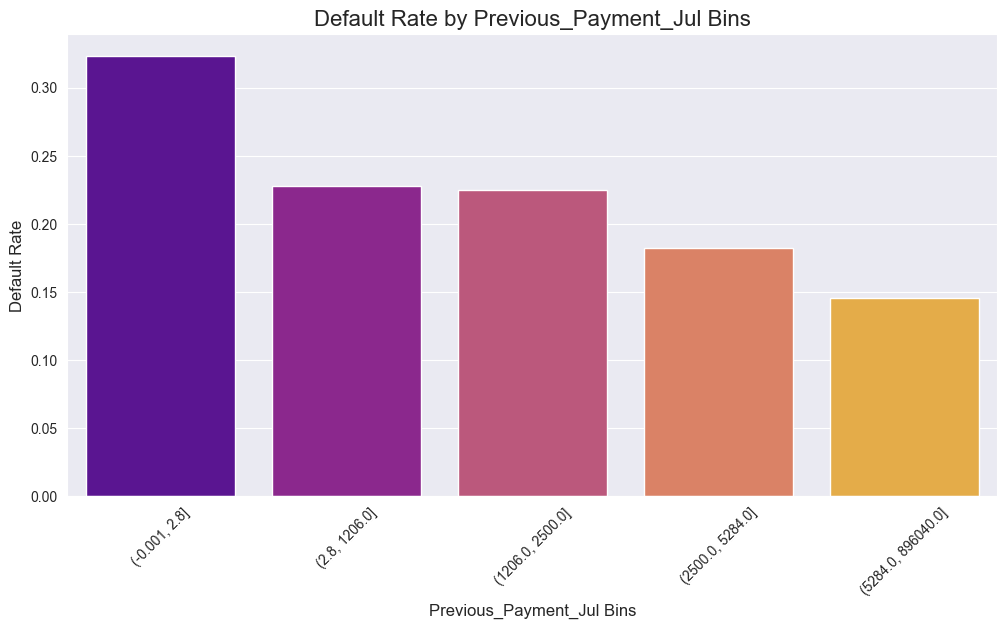

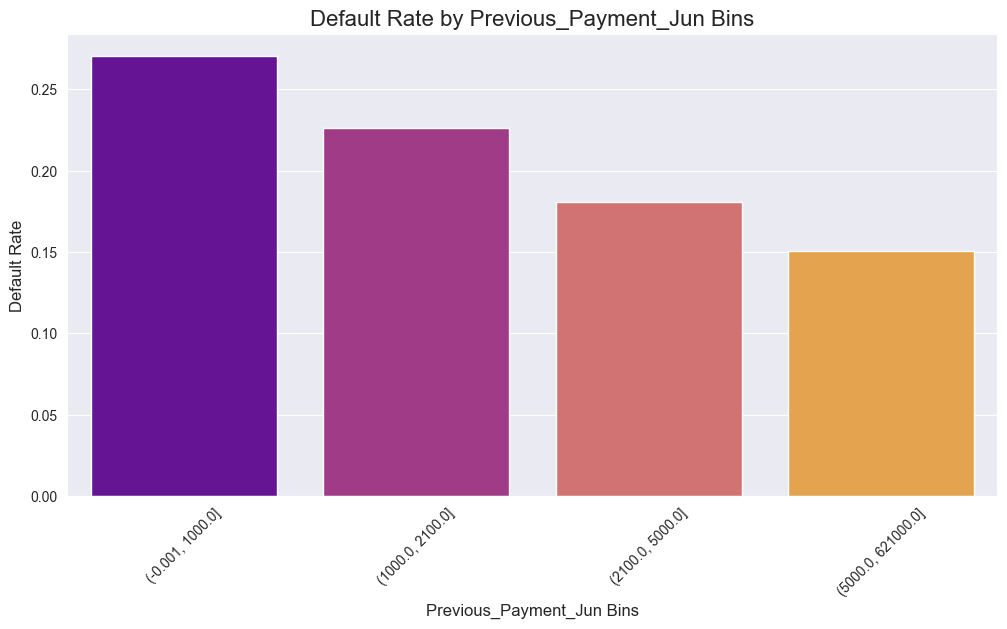

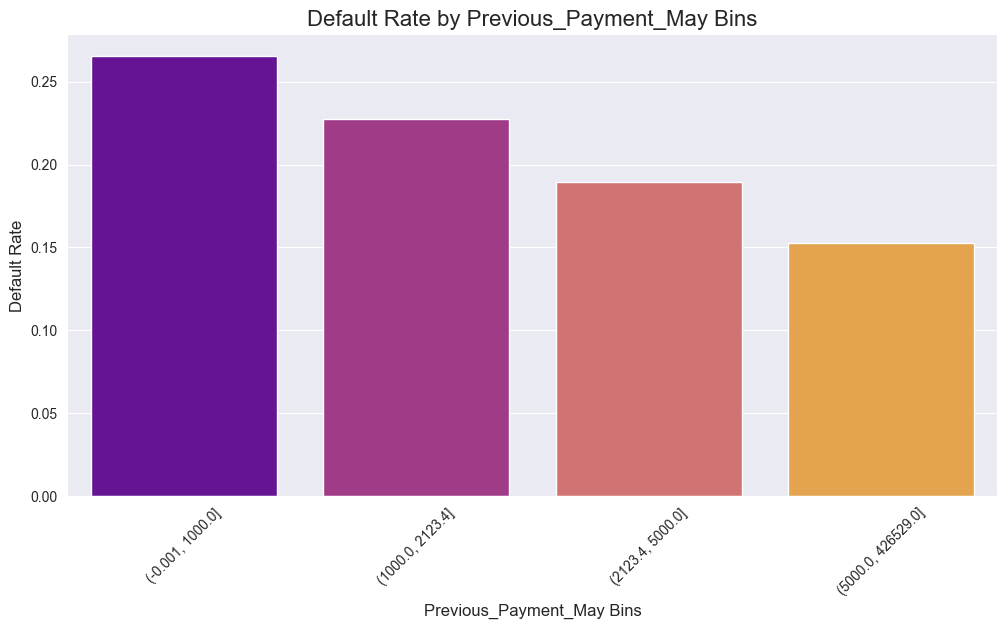

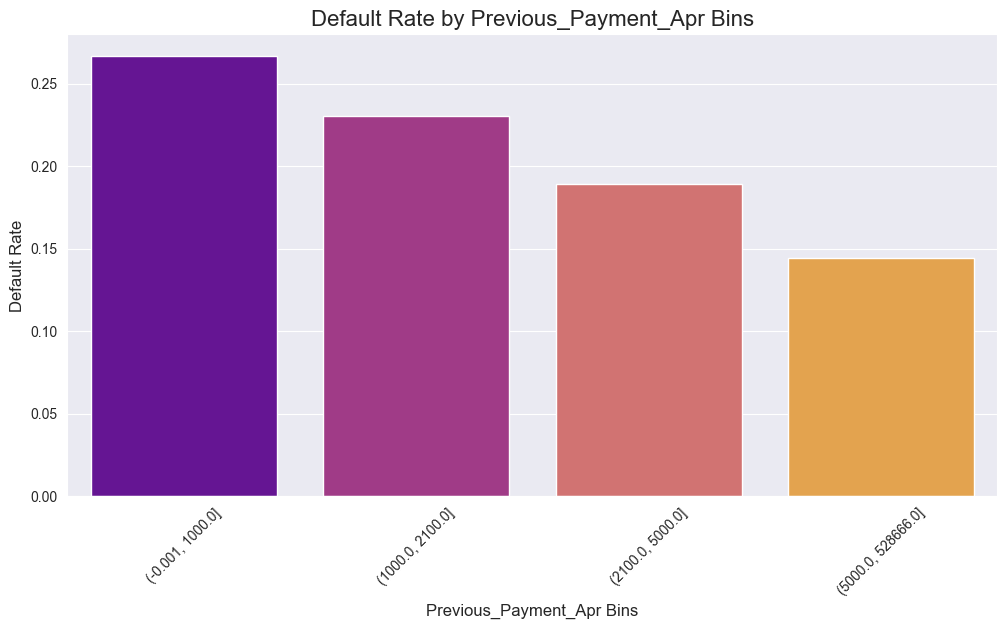

In [70]:
# Bar plots for numerical features vs. Default_Payment

# Define numerical features
numerical_features = ['Credit_Limit', 'Age'] + [col for col in data.columns if 'Bill_Amount' in col or 'Previous_Payment' in col]

# Plotting
for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # For features with many unique values, it's better to bin them first
    # We'll use qcut for features that might be skewed, like bill and payment amounts, to get equal-sized groups
    if data[feature].nunique() > 20:
        try:
            # Use qcut to create bins with equal number of observations
            binned_feature = pd.qcut(data[feature], q=5, duplicates='drop')
            plot_data = data.groupby(binned_feature, observed=False)['Default_Payment'].mean()
        except ValueError:
            # If qcut fails (e.g., due to non-unique bin edges), use cut
            binned_feature = pd.cut(data[feature], bins=5)
            plot_data = data.groupby(binned_feature, observed=False)['Default_Payment'].mean()
    else:
        plot_data = data.groupby(feature, observed=False)['Default_Payment'].mean()

    # Create a bar plot
    ax = sns.barplot(x=plot_data.index.astype(str), y=plot_data.values, hue=plot_data.index.astype(str), palette='plasma', legend=False)

    # Custom labels for Age bins
    if feature == 'Age' and isinstance(plot_data.index, pd.CategoricalIndex):
        ticks = ax.get_xticks()
        labels = [f'{int(round(interval.left))}-{int(round(interval.right))}' for interval in plot_data.index]
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels)

    # Add labels and title
    plt.title(f'Default Rate by {feature} Bins', fontsize=16)
    plt.xlabel(f'{feature} Bins', fontsize=12)
    plt.ylabel('Default Rate', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

### Summary of Bar Plots

The bar plots reveal several key trends about the factors influencing credit card defaults:

#### Categorical Features:
- **Repayment Status**: This is clearly the most significant predictor. The default rate rises sharply as the payment delay increases from one month to two or more. Clients who pay in full or have no consumption have a very low risk of default.
- **Gender**: There is a slight difference in default rates between genders, with one gender showing a marginally higher tendency to default.
- **Education**: Default rates vary across education levels. Typically, higher levels of education (like graduate school) are associated with a lower default rate compared to lower levels (like high school).
- **Marital Status**: The default rate differs between married and single clients, with one group showing a slightly higher propensity to default.

#### Numerical Features (Binned):
- **Credit Limit**: There is a strong inverse relationship. Clients in the lowest credit limit bracket have the highest default rate, and the rate consistently decreases as the credit limit increases.
- **Age**: The default rate shows some variation across different age groups. It is often observed that younger clients might have a slightly higher default rate.
- **Bill Amounts**: The trend for bill amounts is not always linear. However, it can sometimes be seen that clients with very low or very high bill amounts relative to their credit limit have different default behaviors.
- **Previous Payments**: Similar to credit limit, there's a noticeable trend here. Clients who make smaller previous payments (relative to their bill amount) tend to have a higher default rate.

These insights are crucial for feature engineering and for understanding the final model's behavior. The repayment status, in particular, stands out as a dominant feature.


# Modeling
Now that we have a cleaned dataset and have explored the features, we can proceed to build a predictive model. we need to focus on predicting defaults for credit card payments. First, let's re-examine the balance of our target variable to confirm the class imbalance.

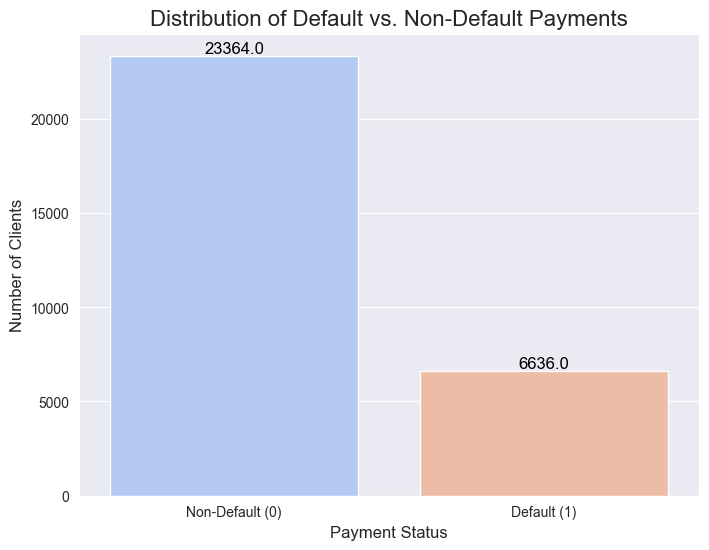

The plot clearly shows that the dataset is imbalanced, with significantly more non-defaulting clients than defaulting ones.


In [71]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Default_Payment', data=data, hue='Default_Payment', palette='coolwarm', legend=False)
plt.title('Distribution of Default vs. Non-Default Payments', fontsize=16)
plt.xlabel('Payment Status', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Default (0)', 'Default (1)'])

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("The plot clearly shows that the dataset is imbalanced, with significantly more non-defaulting clients than defaulting ones.")

#### Modeling approaches
Since this is classification problem below are the approaches I plan to take for credit card default prediction

**Use all 24 features for the prediction**

1. Models to be used
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Support Vector Machine

2. Model will be evaluated based on the below factors
- Precision
- Recall
- F1 Score
- Accuracy
- Confusion matrix - Minimizing False Positives and False Negatives

3. If the above factors are not satisfied improve the model with the below technics
- Hyper parameter tuning with GridSearchCV and RandomizedSearchCV will be performed
- Applying class_weight='balanced'
- Applying class_weight='balanced' along with other configs for the model
- Ensemble methods for better prediction reducing bias and reduce variance (Bagging - High Variance - choose Random Forest, High bias - Boosting - choose AdaBoost/GradientBooster trees)



#### All Feature model prediction with Logistic Regression, K-Nearest Neighbors, Decision Tree and Support Vector Machine

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [73]:
# Define features (X) and target (y)
X = data.drop('Default_Payment', axis=1)
y = data['Default_Payment']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (24000, 23)
X_test shape: (6000, 23)
y_train shape: (24000,)
y_test shape: (6000,)


In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [76]:

# Train and evaluate each model
results = {}  # Dictionary to store results for each model
confusion_matrices = {} # Dictionary to store confusion matrices


In [77]:
for name, model in models.items():
    print(f"--- {name} ---")

    # Note: SVM can be slow to train on this amount of data
    if name == "Support Vector Machine":
        print("Training SVM... this may take a few minutes.")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    test_accuracy = accuracy_score(y_test, y_pred)

    # Store the confusion matrix
    confusion_matrices[name] = cm

    # Store the metrics for class 1 (default) and training accuracy
    results[name] = report['1']
    results[name]['training_accuracy'] = train_accuracy
    results[name]['test_accuracy'] = test_accuracy

    # Display results
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:", name)
    print(cm)
    print("\nClassification Report:", name)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results).T.drop(columns=['support'])
results_df

--- Logistic Regression ---

Training Accuracy: 0.8118

Confusion Matrix: Logistic Regression
[[4529  144]
 [1006  321]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

---------------------------

--- K-Nearest Neighbors ---

Training Accuracy: 0.8410

Confusion Matrix: K-Nearest Neighbors
[[4286  387]
 [ 859  468]]

Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.35      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.7

,precision,recall,f1-score,training_accuracy,test_accuracy
Logistic Regression,0.690323,0.241899,0.358259,0.811833,0.808333
K-Nearest Neighbors,0.547368,0.352675,0.428964,0.840958,0.792333
Decision Tree,0.370779,0.405426,0.387329,0.999458,0.716333
Support Vector Machine,0.666172,0.338357,0.448776,0.825208,0.816167


#### Model comparison for all features

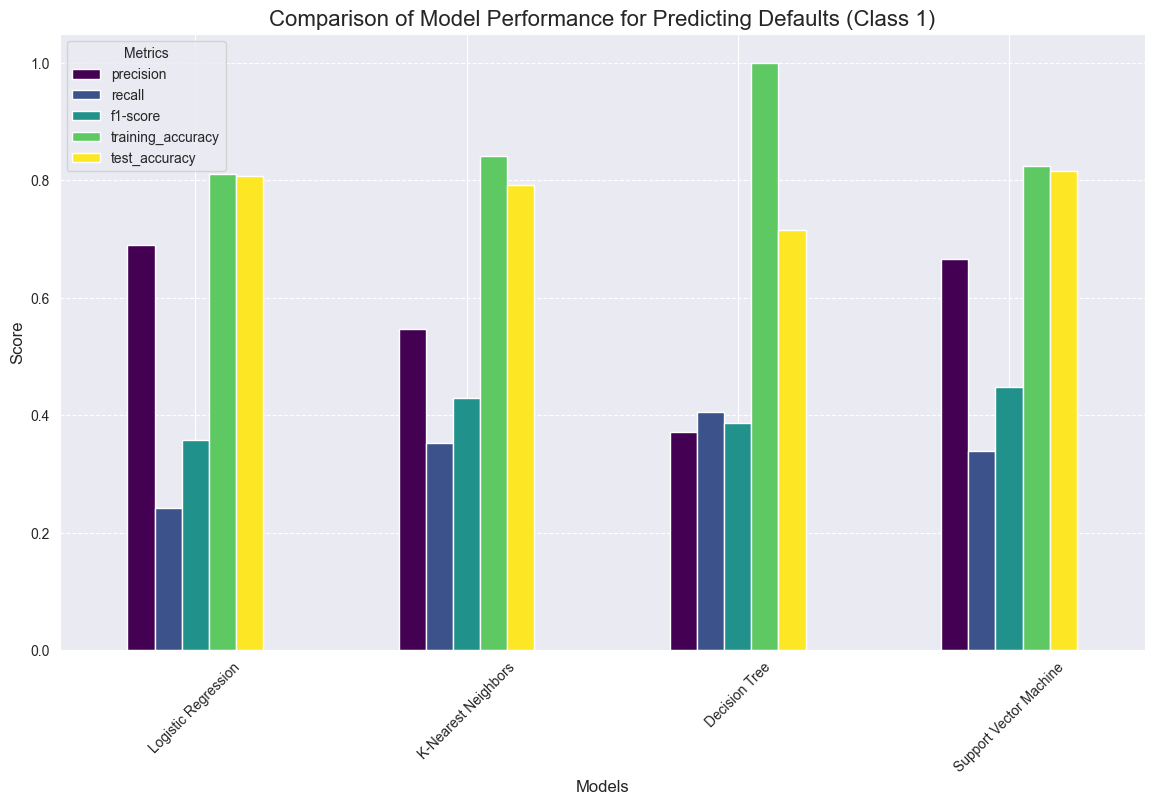

In [78]:
# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(results).T.drop(columns='support') # Drop the 'support' column as it's not needed for this plot

# Plotting the results
results_df.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Comparison of Model Performance for Predicting Defaults (Class 1)', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Confusion Matrix Heatmaps for all features

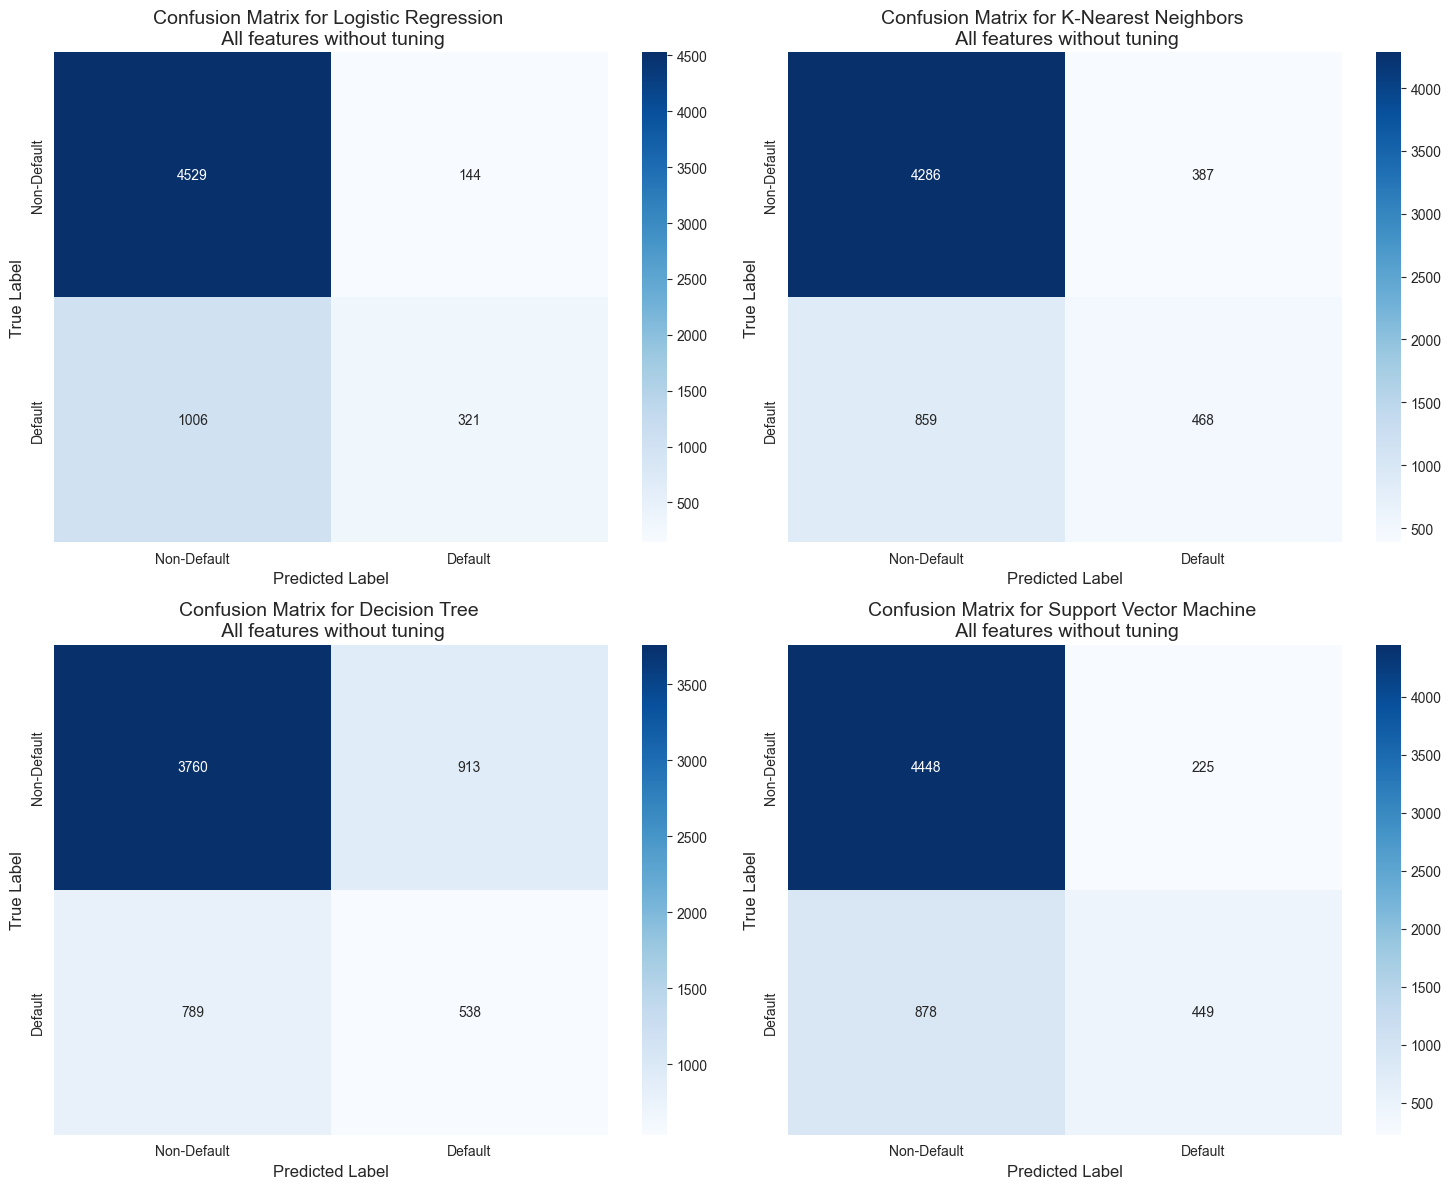

In [79]:
# Plotting confusion matrices as heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    ax.set_title(f'Confusion Matrix for {name} \n All features without tuning', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Summary for the model predictions for all the features



| Feature Set         | Tuning | Ensemble               | Class Weighting        | Model                  | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|---------------------|--------|------------------------|------------------------|------------------------|-----------|--------|----------|-------------------|------------------|
| All Features        | NONE   | NONE                   | NONE                   |Logistic Regression    | 0.690323               | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features        | NONE     | NONE                   | NONE                   | K-Nearest Neighbors    | 0.547368               | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| All Features        | NONE     | NONE   | NONE                   |Decision Tree          | 0.370779               | 0.405426 | 0.387329 |  0.999458 | 0.716333 |
| All Features        | NONE     | NONE   | NONE                   |Support Vector Machine | 0.666172               | 0.338357 | 0.448776 | 0.825208 | 0.816167 |


**Class Imbalance**
- Across models, recall for the default class(1) is low
1. **Logistic Regression** - 0.24
2. **K-Nearest Neighbors** - 0.35
3. **Decision Tree** - 0.41
4. **Support Vector Machine** - 0.33

- True Negative rate for non-default class(0) is very high 95% approximately
- This is a classic **“imbalanced classification”** pattern with a **default decision threshold at 0.5**: the models are conservative, **favoring class 0 and missing many defaults (high FN)**.
- Precision for **class 1 is decent (≈0.55–0.69)**, so the probability scores contain **signal—threshold tuning and class weighting should help recall without completely sacrificing precision**.

**Variance**
- **Decision Tree**: Training accuracy 0.99 vs Testing accuracy 0.71 is high variance or overfitting
- **Logistic Regression and Support Vector Machine**: Has similar training vs test accuracy (0.81 - 0.82), indicating lower variance and better generalization than the tree
- **K-Nearest Neighbors**: shows some overfit (train 0.84 vs test 0.79) and tends to be sensitive to local noise

#### Model with GridSearchCV hyperparameter tuning (All Features)

In [80]:
# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf']
    }
}

In [81]:

# Store best estimators
best_estimators = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"--- Tuning {name} ---")

    # Reduce parameter grid for faster execution if needed, especially for SVM
    if name == "Support Vector Machine":
        # A smaller grid for SVM to reduce runtime
        param_grids[name] = {'C': [0.1, 1], 'gamma': [0.1, 0.01]}


    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                               cv=3, n_jobs=-1, verbose=2, scoring='f1')

    # Fit on the scaled, resampled training data
    grid_search.fit(X_train_scaled, y_train)

    # Store the best estimator
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print("-" * (len(name) + 20) + "\n")

print("Grid search complete for all models.")
best_estimators

--- Tuning Logistic Regression ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
---------------------------------------

--- Tuning K-Nearest Neighbors ---
Fitting 3 folds for each of

{'Logistic Regression': LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear'),
 'K-Nearest Neighbors': KNeighborsClassifier(metric='euclidean', n_neighbors=7),
 'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
 'Support Vector Machine': SVC(C=1, gamma=0.1, random_state=42)}

In [82]:
# Evaluate the best estimators on the test set
tuned_grd_results_all = {}
tuned_grd_confusion_matrices_all = {}

for name, model in best_estimators.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    test_accuracy = accuracy_score(y_test, y_pred)

    # Store the confusion matrix
    tuned_grd_confusion_matrices_all[name] = cm

    # Store the metrics for class 1 (default) and training accuracy
    tuned_grd_results_all[name] = report['1']
    tuned_grd_results_all[name]['training_accuracy'] = train_accuracy
    tuned_grd_results_all[name]['test_accuracy'] = test_accuracy

    # Display results
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:", name)
    print(cm)
    print("\nClassification Report:", name)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")

# Convert results to DataFrame for easier analysis
tuned_grd_results_all_df = pd.DataFrame(tuned_grd_results_all).T.drop(columns=['support'])
tuned_grd_results_all_df


Training Accuracy: 0.8118

Confusion Matrix: Logistic Regression
[[4526  147]
 [1005  322]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

---------------------------


Training Accuracy: 0.8340

Confusion Matrix: K-Nearest Neighbors
[[4343  330]
 [ 872  455]]

Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4673
           1       0.58      0.34      0.43      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.65      6000
weighted avg       0.78      0.80      0.78      6000

---------------------------


Training Accu

,precision,recall,f1-score,training_accuracy,test_accuracy
Logistic Regression,0.686567,0.242653,0.358575,0.811833,0.808000
K-Nearest Neighbors,0.579618,0.342879,0.430871,0.834042,0.799667
Decision Tree,0.621693,0.354182,0.451272,0.844833,0.809500
Support Vector Machine,0.661120,0.329314,0.439638,0.834458,0.814333


#### Confusion Matrix for tuned models using GridSearchCV (All features)

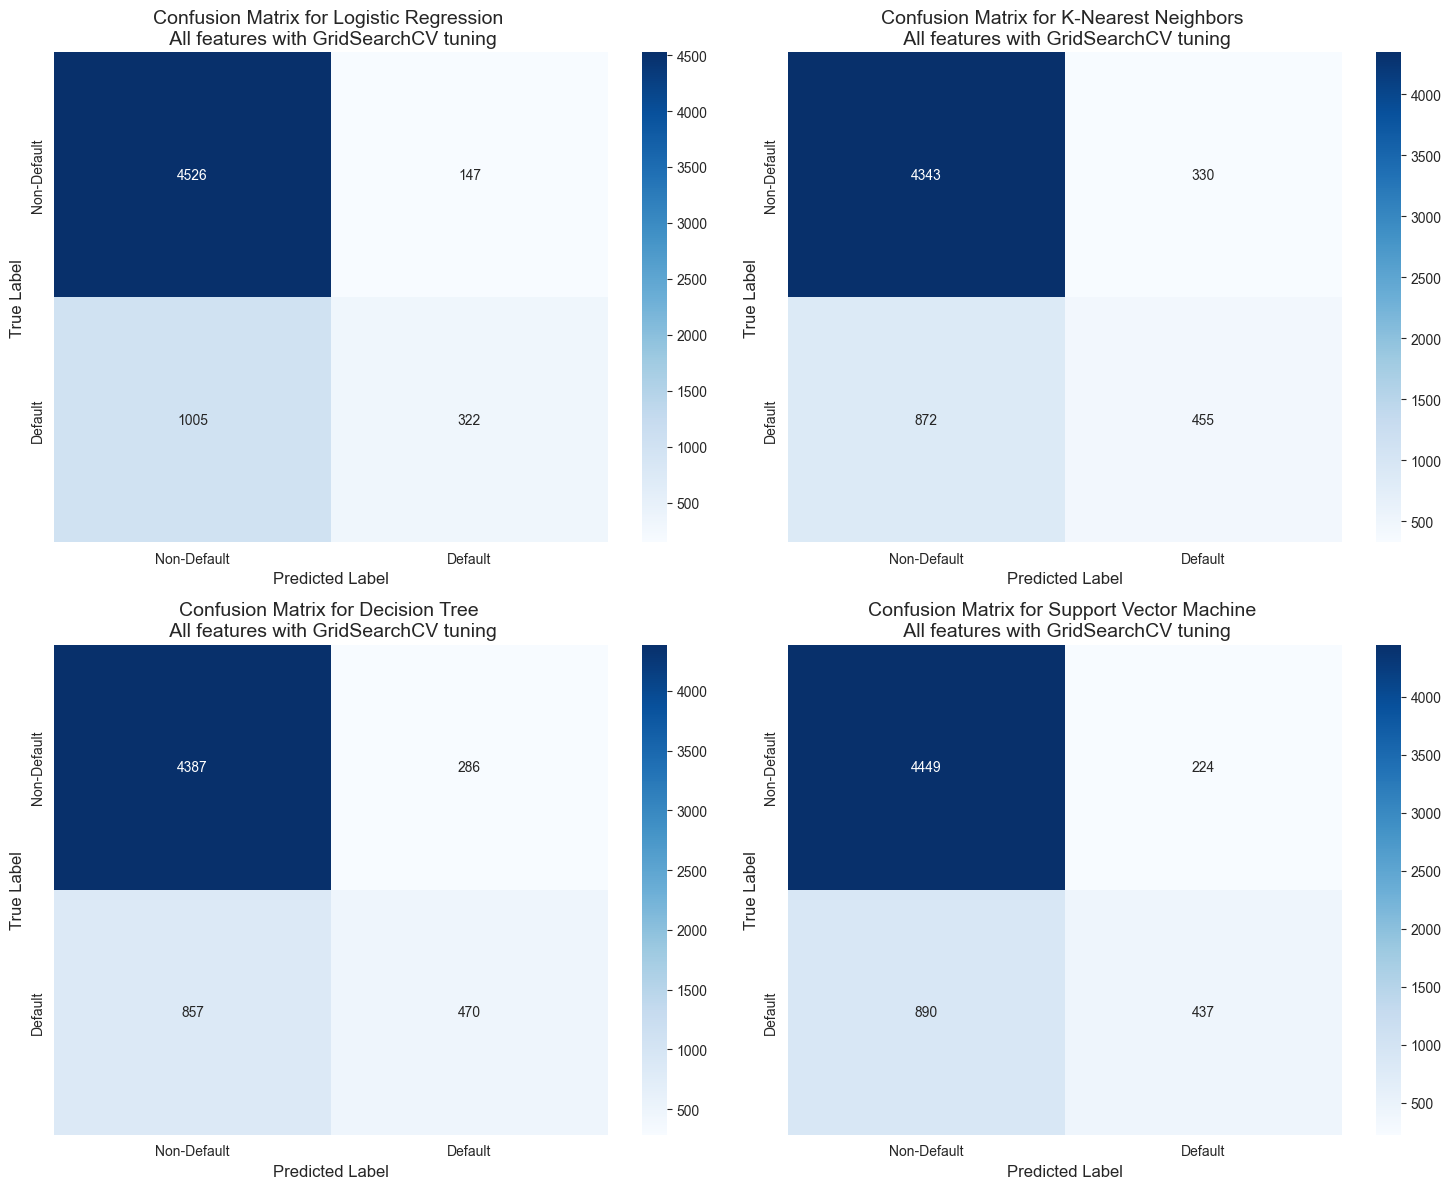

In [83]:
# Plotting confusion matrices as heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(tuned_grd_confusion_matrices_all.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    ax.set_title(f'Confusion Matrix for {name} \n All features with GridSearchCV tuning', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Model comparison summary for GridSearchCV tuning (All Features)
| Feature Set         | Tuning       | Ensemble               | Class Weighting| Model                  | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|---------------------|--------------|------------------------|----------------|------------------------|-----------|--------|----------|-------------------|------------------|
| All Features        | NONE         | NONE                   | NONE                   |Logistic Regression    | 0.690323               | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features        | NONE         | NONE                   | NONE                   |K-Nearest Neighbors    | 0.547368               | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| **All Features**        | **NONE**         | **NONE**   |NONE                   | **Decision Tree**      | **0.370779**           | **0.405426** | **0.387329** |  **0.999458** | **0.716333** |
| All Features        | NONE         | NONE   | NONE                   |Support Vector Machine | 0.666172               | 0.338357 | 0.448776 | 0.825208 | 0.816167 |
| All Features        | GridSearchCV | NONE   | NONE                   |Logistic Regression    | 0.686567               |0.242653|0.358575|0.811833|0.808000|
| All Features        | GridSearchCV         | NONE   | NONE                   |K-Nearest Neighbors    | 0.579618               |0.342879|0.430871|0.834042|0.799667|
| **All Features**        | **GridSearchCV**         | **NONE**   | NONE                   |**Decision Tree**      | **0.621693**           |**0.354182**|**0.451272**|**0.844833**|**0.809500**|
| All Features        | GridSearchCV         | NONE   |NONE                   | Support Vector Machine | 0.661120               |0.329314|0.439638|0.834458|0.814333|

- **Tuning helped only Decision tree** by increasing **0.37 to 0.62**
- **Logistic Regression and Support Vector Machine still generalize better** but the recalls are not satisfactory. It has not improved








In [84]:
# Store best estimators
best_estimators = {}
for name, model in models.items():
    print(f"--- Tuning {name} ---")
    if name == "Support Vector Machine":
        param_grids[name] = {'C': [0.1, 1], 'gamma': [0.1, 0.01]}
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], n_iter=4, random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_estimators[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print("-" * (len(name) + 20) + "\n")
    print("Grid search complete for all models.")
    best_estimators[name] = random_search.best_estimator_


best_estimators

--- Tuning Logistic Regression ---


/Users/joambrose/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=4. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 1}
---------------------------------------

Grid search complete for all models.
--- Tuning K-Nearest Neighbors ---
Best parameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}
---------------------------------------

Grid search complete for all models.
--- Tuning Decision Tree ---
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
---------------------------------

Grid search complete for all models.
--- Tuning Support Vector Machine ---
Best parameters for Support Vector Machine: {'gamma': 0.1, 'C': 1}
------------------------------------------

Grid search complete for all models.


{'Logistic Regression': LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear'),
 'K-Nearest Neighbors': KNeighborsClassifier(metric='manhattan', n_neighbors=7),
 'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                        random_state=42),
 'Support Vector Machine': SVC(C=1, gamma=0.1, random_state=42)}

In [85]:
# Evaluate the best estimators on the test set
tuned_rnd_results_all = {}
tuned_rnd_confusion_matrices_all = {}

for name, model in best_estimators.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    test_accuracy = accuracy_score(y_test, y_pred)

    # Store the confusion matrix
    tuned_rnd_confusion_matrices_all[name] = cm

    # Store the metrics for class 1 (default) and training accuracy
    tuned_rnd_results_all[name] = report['1']
    tuned_rnd_results_all[name]['training_accuracy'] = train_accuracy
    tuned_rnd_results_all[name]['test_accuracy'] = test_accuracy

    # Display results
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:", name)
    print(cm)
    print("\nClassification Report:", name)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")

# Convert results to DataFrame for easier analysis
tuned_rnd_results_all_df = pd.DataFrame(tuned_rnd_results_all).T.drop(columns=['support'])
tuned_rnd_results_all_df


Training Accuracy: 0.8118

Confusion Matrix: Logistic Regression
[[4526  147]
 [1005  322]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

---------------------------


Training Accuracy: 0.8343

Confusion Matrix: K-Nearest Neighbors
[[4332  341]
 [ 872  455]]

Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4673
           1       0.57      0.34      0.43      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.63      0.65      6000
weighted avg       0.77      0.80      0.78      6000

---------------------------


Training Accu

,precision,recall,f1-score,training_accuracy,test_accuracy
Logistic Regression,0.686567,0.242653,0.358575,0.811833,0.808000
K-Nearest Neighbors,0.571608,0.342879,0.428639,0.834250,0.797833
Decision Tree,0.627346,0.352675,0.451520,0.843458,0.810500
Support Vector Machine,0.661120,0.329314,0.439638,0.834458,0.814333


#### Confusion Matrix for tuned models using RandomizedSearchCV (All features)

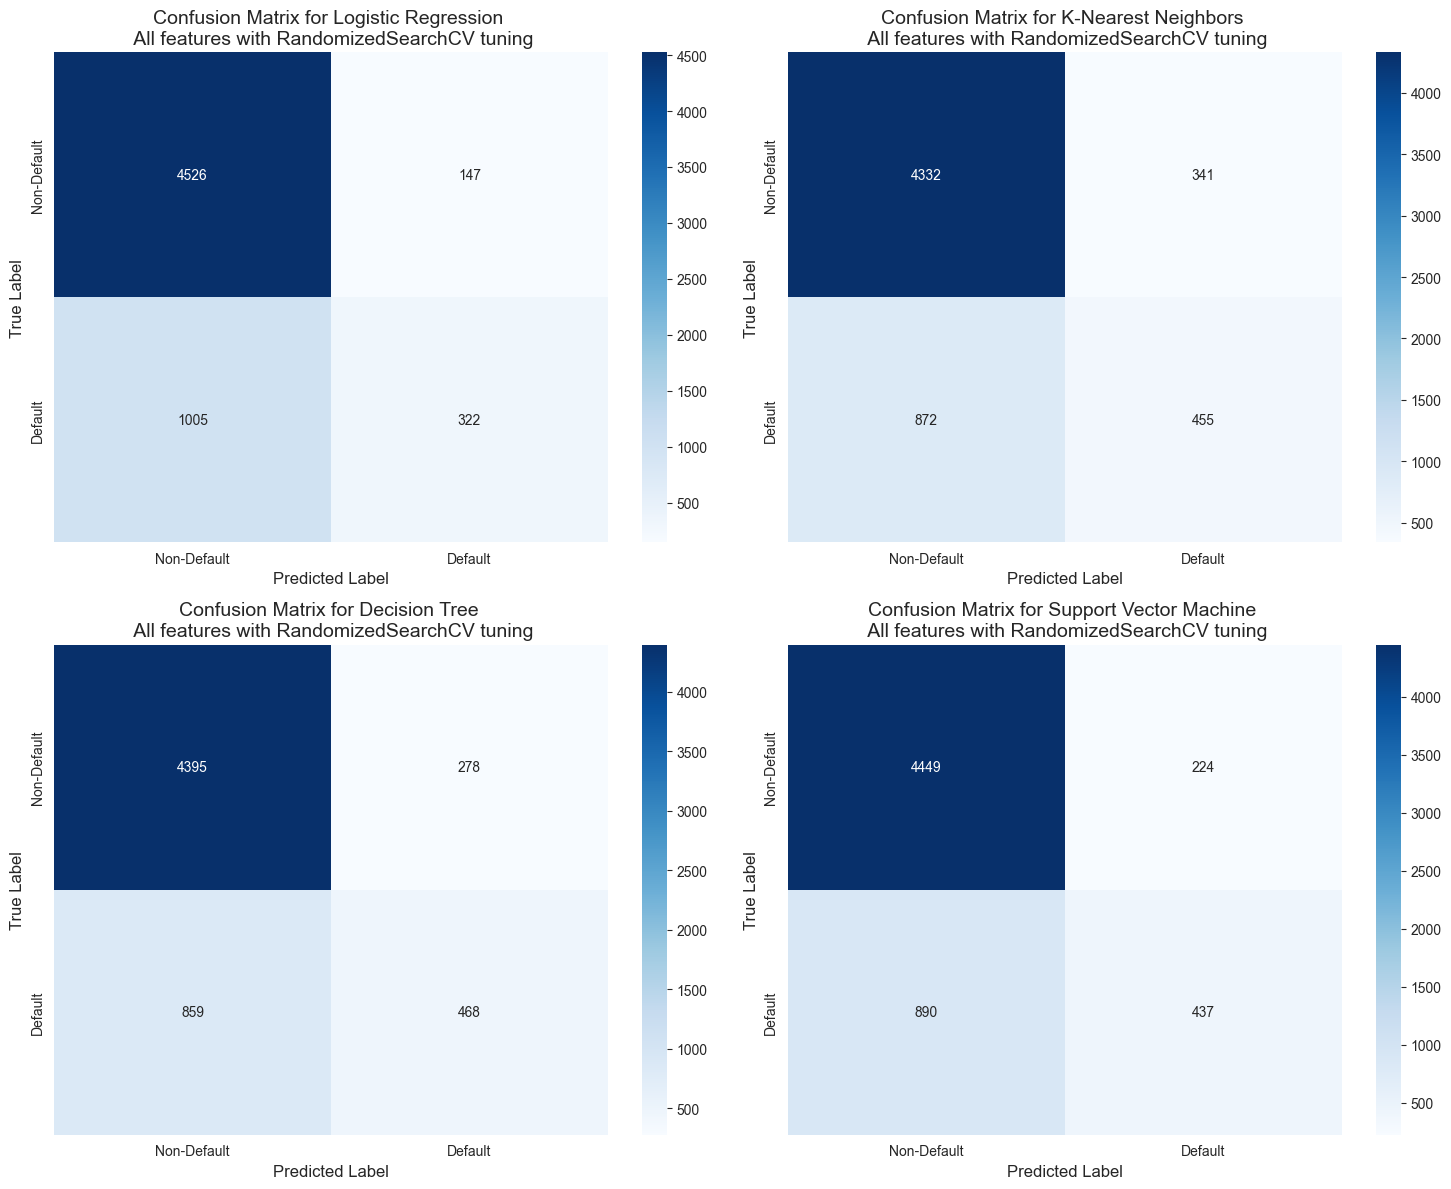

In [86]:
# Plotting confusion matrices as heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(tuned_rnd_confusion_matrices_all.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    ax.set_title(f'Confusion Matrix for {name} \n All features with RandomizedSearchCV tuning', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Model Summary with RandomizedCV tuning on all features

| Feature Set         | Tuning             | Ensemble               | Model                  | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|---------------------|--------------------|------------------------|------------------------|-----------|--------|----------|-------------------|------------------|
| All Features        | NONE               | NONE                   | Logistic Regression    | 0.690323               | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features        | NONE               | NONE                   | K-Nearest Neighbors    | 0.547368               | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| **All Features**        | **NONE**               | **NONE**   | **Decision Tree**          | **0.370779**               | **0.405426** | **0.387329** |  **0.999458** | **0.716333** |
| All Features        | NONE               | NONE   | Support Vector Machine | 0.666172               | 0.338357 | 0.448776 | 0.825208 | 0.816167 |
| All Features        | GridSearchCV       | NONE   | Logistic Regression    |0.686567|0.242653|0.358575|0.811833|0.808000|
| All Features        | GridSearchCV       | NONE   | K-Nearest Neighbors    |0.579618|0.342879|0.430871|0.834042|0.799667|
| **All Features**        | **GridSearchCV**       | **NONE**   | **Decision Tree**          |**0.621693**|**0.354182**|**0.451272**|**0.844833**|**0.809500**|
| All Features        | GridSearchCV       | NONE   | Support Vector Machine |0.661120|0.329314|0.439638|0.834458|0.814333|
| All Features        | RandomizedSearchCV | NONE   | Logistic Regression    |0.686567|0.242653|0.358575|0.811833|0.808000|
| All Features        | RandomizedSearchCV       | NONE   | K-Nearest Neighbors    |0.571608|0.342879|0.428639|0.834250|0.797833|
| **All Features**        | **RandomizedSearchCV**       | **NONE**   | **Decision Tree**          |**0.627346**|**0.352675**|**0.451520**|**0.843458**|**0.810500**|
| All Features        | RandomizedSearchCV       | NONE   | Support Vector Machine |0.661120|0.329314|0.439638|0.834458|0.814333|

- RandomizedSearchCV improved only the precision for DecisionTree similar to GridSearchCV, But recall values are still low across models
- **Logistic Regression and Support Vector Machine still generalize better** but the recalls are not satisfactory. It has not improved






#### Modeling by applying class_weight='balanced' (All features)

In [87]:
models_weighted = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(), # KNN does not have class_weight
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced')
}

In [88]:

class_weighted_results_all = {}
class_weighted_confusion_matrices_all = {}

In [89]:
for name, model in models_weighted.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    test_accuracy = accuracy_score(y_test, y_pred)
    class_weighted_confusion_matrices_all[name] = cm
    class_weighted_results_all[name] = report['1']
    class_weighted_results_all[name]['training_accuracy'] = train_accuracy
    class_weighted_results_all[name]['test_accuracy'] = test_accuracy
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:", name)
    print(cm)
    print("\nClassification Report:", name)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")


# Convert results to DataFrame for easier analysis
class_weighted_results_all_df = pd.DataFrame(class_weighted_results_all).T.drop(columns=['support'])
class_weighted_results_all_df



Training Accuracy: 0.6940

Confusion Matrix: Logistic Regression
[[3254 1419]
 [ 504  823]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

---------------------------


Training Accuracy: 0.8410

Confusion Matrix: K-Nearest Neighbors
[[4286  387]
 [ 859  468]]

Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.35      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000

---------------------------


Training Accu

,precision,recall,f1-score,training_accuracy,test_accuracy
Logistic Regression,0.367083,0.620196,0.461194,0.694042,0.679500
K-Nearest Neighbors,0.547368,0.352675,0.428964,0.840958,0.792333
Decision Tree,0.386086,0.380558,0.383302,0.999375,0.729167
Support Vector Machine,0.494997,0.559156,0.525124,0.789208,0.776333


| Feature Set         | Tuning       | Ensemble               | Class Weighting | Model                  | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|---------------------|--------------|------------------------|-----------------|------------------------|-----------|--------|----------|-------------------|------------------|
| All Features        | NONE         | NONE                   | NONE            | Logistic Regression    | 0.690323               | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features        | NONE         | NONE                   | NONE            | K-Nearest Neighbors    | 0.547368               | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| All Features        | NONE         | NONE   | NONE            | Decision Tree          | 0.370779               | 0.405426 | 0.387329 |  0.999458 | 0.716333 |
| All Features        | NONE         | NONE   | NONE            | Support Vector Machine | 0.666172               | 0.338357 | 0.448776 | 0.825208 | 0.816167 |
| All Features        | GridSearchCV | NONE   | NONE            | Logistic Regression    | 0.686567               |0.242653|0.358575|0.811833|0.808000|
| All Features        | GridSearchCV         | NONE   | NONE            | K-Nearest Neighbors    | 0.579618               |0.342879|0.430871|0.834042|0.799667|
| All Features        | GridSearchCV         | NONE   | NONE            | Decision Tree          | 0.621693               |0.354182|0.451272|0.844833|0.809500|
| All Features        | GridSearchCV         | NONE   | NONE            | Support Vector Machine | 0.661120               |0.329314|0.439638|0.834458|0.814333|
| All Features        | RandomizedSearchCV | NONE   | NONE            | Logistic Regression    | 0.686567               |0.242653|0.358575|0.811833|0.808000|
| All Features        | RandomizedSearchCV       | NONE   | NONE            | K-Nearest Neighbors    | 0.571608               |0.342879|0.428639|0.834250|0.797833|
| All Features        | RandomizedSearchCV       | NONE   | NONE            | Decision Tree          | 0.627346               |0.352675|0.451520|0.843458|0.810500|
| All Features        | RandomizedSearchCV       | NONE   | NONE            | Support Vector Machine | 0.661120               |0.329314|0.439638|0.834458|0.814333|
| **All Features**        | **NONE**         | **NONE**                   | **Balanced**    | **Logistic Regression**    |**0.367083**|**0.620196**|**0.461194**|**0.694042**|**0.679500**|
| **All Features**        | **NONE**         | **NONE**                   | **Balanced**    | **K-Nearest Neighbors**    |**0.547368**|**0.352675**|**0.428964**|**0.840958**|**0.792333**|
| **All Features**        | **NONE**         | **NONE**   | **NONE**        | **Decision Tree**          |**0.386086**|**0.380558**|**0.383302**|**0.999375**|**0.729167**|
| **All Features**        | **NONE**         | **NONE**   | **Balanced**    | **Support Vector Machine** |**0.494997**|**0.559156**|**0.525124**|**0.789208**|**0.776333**|

**Class weighting did what it should: it shifted predictions toward class 1, substantially boosting recall.**
- **Logistic Regression (balanced)**: recall jumped to 0.62 but with low precision (0.37), which drove overall accuracy down (more false positives).
- **SVM (balanced)**: the best overall trade-off so far—precision 0.495, recall 0.559, F1 0.525, and higher test accuracy (0.776) than balanced LR.
- **Decision Tree** still shows high training accuracy (1.0), i.e., overfitting; class_weight helped little here.
- **K-Nearest Neighbors** isn’t affected by class_weight and remains the same.






#### Applying class_weight='balanced' with all Features + few more configs

In [90]:
models_weighted_plus = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', penalty='l2', solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(), # KNN does not have class_weight
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', kernel='linear', probability=True)
}

In [91]:
# Train and evaluate each model
results_all_weighted_plus = {}  # Dictionary to store results for each model
confusion_matrices_all_weighted_plus = {} # Dictionary to store confusion matrices

In [92]:
for name, model in models_weighted_plus.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    test_accuracy = accuracy_score(y_test, y_pred)
    confusion_matrices_all_weighted_plus[name] = cm
    results_all_weighted_plus[name] = report['1']
    results_all_weighted_plus[name]['training_accuracy'] = train_accuracy
    results_all_weighted_plus[name]['test_accuracy'] = test_accuracy
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:", name)
    print(cm)
    print("\nClassification Report:", name)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")

results_all_weighted_plus_df = pd.DataFrame(results_all_weighted_plus).T.drop(columns=['support'])
results_all_weighted_plus_df


Training Accuracy: 0.6940

Confusion Matrix: Logistic Regression
[[3254 1419]
 [ 504  823]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

---------------------------


Training Accuracy: 0.8410

Confusion Matrix: K-Nearest Neighbors
[[4286  387]
 [ 859  468]]

Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4673
           1       0.55      0.35      0.43      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000

---------------------------


Training Accu

,precision,recall,f1-score,training_accuracy,test_accuracy
Logistic Regression,0.367083,0.620196,0.461194,0.693958,0.679500
K-Nearest Neighbors,0.547368,0.352675,0.428964,0.840958,0.792333
Decision Tree,0.386086,0.380558,0.383302,0.999375,0.729167
Support Vector Machine,0.467347,0.517709,0.491241,0.770083,0.762833


#### Model comparison with Applying class_weight='balanced' with all Features + few more configs

| Feature Set         | Tuning       | Ensemble               | Class Weighting | Model                  | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|---------------------|--------------|------------------------|-----------------|------------------------|-----------|--------|----------|-------------------|------------------|
| All Features        | NONE         | NONE                   | NONE            | Logistic Regression    | 0.690323               | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features        | NONE         | NONE                   | NONE            | K-Nearest Neighbors    | 0.547368               | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| All Features        | NONE         | NONE   | NONE            | Decision Tree          | 0.370779               | 0.405426 | 0.387329 |  0.999458 | 0.716333 |
| **All Features**        | **NONE**         | **NONE**   | **NONE**            | **Support Vector Machine** | **0.666172**               | **0.338357** | **0.448776** | **0.825208** | **0.816167** |
| All Features        | GridSearchCV | NONE   | NONE            | Logistic Regression    | 0.686567               |0.242653|0.358575|0.811833|0.808000|
| All Features        | GridSearchCV         | NONE   | NONE            | K-Nearest Neighbors    | 0.579618               |0.342879|0.430871|0.834042|0.799667|
| All Features        | GridSearchCV         | NONE   | NONE            | Decision Tree          | 0.621693               |0.354182|0.451272|0.844833|0.809500|
| **All Features**        | **GridSearchCV**         | **NONE**   | **NONE**            | **Support Vector Machine** | **0.661120**               |**0.329314**|**0.439638**|**0.834458**|**0.814333**|
| All Features        | RandomizedSearchCV | NONE   | NONE            | Logistic Regression    | 0.686567               |0.242653|0.358575|0.811833|0.808000|
| All Features        | RandomizedSearchCV       | NONE   | NONE            | K-Nearest Neighbors    | 0.571608               |0.342879|0.428639|0.834250|0.797833|
| All Features        | RandomizedSearchCV       | NONE   | NONE            | Decision Tree          | 0.627346               |0.352675|0.451520|0.843458|0.810500|
| **All Features**        | **RandomizedSearchCV**       | **NONE**   | **NONE**            | **Support Vector Machine** | **0.661120**               |**0.329314**|**0.439638**|**0.834458**|**0.814333**|
| All Features        | NONE         | NONE                   | Balanced        | Logistic Regression    |0.367083|0.620196|0.461194|0.694042|0.679500|
| All Features        | NONE         | NONE                   | Balanced        | K-Nearest Neighbors    |0.547368|0.352675|0.428964|0.840958|0.792333|
| All Features        | NONE         | NONE   | NONE            | Decision Tree          |0.386086|0.380558|0.383302|0.999375|0.729167|
| **All Features**        | **NONE**         | **NONE**   | **Balanced**        | **Support Vector Machine** |**0.494997**|**0.559156**|**0.525124**|**0.789208**|**0.776333**|
| All Features        | NONE         | NONE                   | Balanced +      | Logistic Regression    |0.367083|0.620196|0.461194|0.693958|0.679500|
| All Features        | NONE         | NONE                   | Balanced +      | K-Nearest Neighbors    |0.547368|0.352675|0.428964|0.840958|0.792333|
| All Features        | NONE         | NONE   | NONE            | Decision Tree          |0.386086|0.380558|0.383302|0.999375|0.729167|
| **All Features**        | **NONE**         | **NONE**   | **Balanced +**      | **Support Vector Machine** |**0.467347**|**0.517709**|**0.491241**|**0.770083**|**0.762833**|


- **Balanced SVM is best base model** so far (precision 0.495, recall 0.559, F1 0.525, test acc 0.77). Good recall without an excessive false-positive rate.
- **Balanced Logistic Regression** strongly increases recall (0.62) but with low precision (0.37), which lowers accuracy—expected when shifting the decision boundary toward the minority class.
- **K-Nearest Neighbors** is unaffected by class_weight and remains unchanged.
- **Decision Tree** still shows signs of high variance; regularization or switching to ensembles is recommended.
- **“Balanced +” configs** didn’t help; likely minor tweaks





#### Boosting Ensemble method AdaBoost for models (All features)

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

models_weighted_ada_boosting = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000,  C=0.2, solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(random_state=42,  max_depth=1)
}

# Train and evaluate each model
results_all_weighted_ab = {}  # Dictionary to store results for each model
confusion_matrices_all_weighted_ab = {} # Dictionary to store confusion matrices
for name, model in models_weighted_ada_boosting.items():
    adaBoostClassifier = AdaBoostClassifier( estimator=model, n_estimators=100, learning_rate=0.5, random_state=42 )


    adaBoostClassifier.fit(X_train_scaled, y_train)
    y_train_pred = adaBoostClassifier.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = adaBoostClassifier.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    test_accuracy = accuracy_score(y_test, y_pred)
    confusion_matrices_all_weighted_ab[name] = cm
    results_all_weighted_ab[name] = report['1']
    results_all_weighted_ab[name]['training_accuracy'] = train_accuracy
    results_all_weighted_ab[name]['test_accuracy'] = test_accuracy
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:", name)
    print(cm)
    print("\nClassification Report:", name)
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")

results_all_weighted_ab_df = pd.DataFrame(results_all_weighted_ab).T.drop(columns=['support'])
results_all_weighted_ab_df





Training Accuracy: 0.7820

Confusion Matrix: Logistic Regression
[[4657   16]
 [1273   54]]

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4673
           1       0.77      0.04      0.08      1327

    accuracy                           0.79      6000
   macro avg       0.78      0.52      0.48      6000
weighted avg       0.78      0.79      0.70      6000

---------------------------


Training Accuracy: 0.8205

Confusion Matrix: Decision Tree
[[4451  222]
 [ 878  449]]

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

---------------------



,precision,recall,f1-score,training_accuracy,test_accuracy
Logistic Regression,0.771429,0.040693,0.077309,0.782042,0.785167
Decision Tree,0.669151,0.338357,0.449449,0.820458,0.816667


#### Summary for Adaboost on all features
#### Overall Modeling Summary

| Feature Set         | Tuning       | Ensemble | Class Weighting | Model                  | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|---------------------|--------------|----------|-----------------|------------------------|--------|--------|--------|-------------------|--------------|
| All Features        | NONE         | NONE     | NONE            | Logistic Regression    | 0.690323           | 0.241899 | 0.358259 | 0.811833          | 0.808333 |
| All Features        | NONE         | NONE     | NONE            | K-Nearest Neighbors    | 0.547368           | 0.352675 | 0.428964 | 0.840958          | 0.792333 |
| All Features        | NONE         | NONE     | NONE            | Decision Tree          | 0.370779           | 0.405426 | 0.387329 | 0.999458          | 0.716333 |
| All Features        | NONE         | NONE     | NONE            | Support Vector Machine | 0.666172           | 0.338357 | 0.448776 | 0.825208          | 0.816167 |
| All Features        | GridSearchCV | NONE     | NONE            | Logistic Regression    | 0.686567           |0.242653|0.358575| 0.811833          |0.808000|
| All Features        | GridSearchCV     | NONE     | NONE            | K-Nearest Neighbors    | 0.579618           |0.342879|0.430871| 0.834042          |0.799667|
| All Features        | GridSearchCV     | NONE     | NONE            | Decision Tree          | 0.621693           |0.354182|0.451272| 0.844833          |0.809500|
| All Features        | GridSearchCV     | NONE     | NONE            | Support Vector Machine | 0.661120           |0.329314|0.439638| 0.834458          |0.814333|
| All Features        | RandomizedSearchCV | NONE     | NONE            | Logistic Regression    | 0.686567           |0.242653|0.358575| 0.811833          |0.808000|
| All Features        | RandomizedSearchCV   | NONE     | NONE            | K-Nearest Neighbors    | 0.571608           |0.342879|0.428639| 0.834250          |0.797833|
| All Features        | RandomizedSearchCV   | NONE     | NONE            | Decision Tree          | 0.627346           |0.352675|0.451520| 0.843458          |0.810500|
| All Features        | RandomizedSearchCV   | NONE     | NONE            | Support Vector Machine | 0.661120           |0.329314|0.439638| 0.834458          |0.814333|
| All Features        | NONE         | NONE     | Balanced        | Logistic Regression    |0.367083|0.620196|0.461194| 0.694042          |0.679500|
| All Features        | NONE         | NONE     | Balanced        | K-Nearest Neighbors    |0.547368|0.352675|0.428964| 0.840958          |0.792333|
| All Features        | NONE         | NONE     | NONE            | Decision Tree          |0.386086|0.380558|0.383302| 0.999375          |0.729167|
| All Features        | NONE         | NONE     | Balanced        | Support Vector Machine |0.494997|0.559156|0.525124| 0.789208          |0.776333|
| All Features        | NONE         | NONE     | Balanced +      | Logistic Regression    |0.367083|0.620196|0.461194| 0.693958          |0.679500|
| All Features        | NONE         | NONE     | Balanced +      | K-Nearest Neighbors    |0.547368|0.352675|0.428964| 0.840958          |0.792333|
| All Features        | NONE         | NONE     | NONE            | Decision Tree          |0.386086|0.380558|0.383302| 0.999375          |0.729167|
| All Features        | NONE         | NONE     | Balanced +      | Support Vector Machine |0.467347|0.517709|0.491241| 0.770083          |0.762833|
| **All Features**        | **NONE**         | **AdaBoost** | **NONE**            | **Logistic Regression**    |**0.771429**|**0.040693**|**0.077309**| **0.782042**      |**0.785167**|
| **All Features**        | **NONE**         | **AdaBoost**     | **NONE**            | **Decision Tree**                   |**0.669151**|**0.338357**|**0.449449**| **0.820458**      |**0.816667**|


- **Logistic Regression**: precision=0.77, recall=0.04, f1=0.08, test acc=0.785
- The model is extremely conservative (almost never predicts positive). That’s why precision is high but recall and F1 are very low.
- **Decision Tree + AdaBoost (SAMME)**: precision=0.67, recall=0.34, f1=0.45, test acc=0.817
This is still your best performer for the minority class.


#### Boosting Ensemble method GradientBooosterTrees for models (All features)

In [94]:
from sklearn.ensemble import GradientBoostingClassifier


# Train and evaluate each model
results_all_weighted_gr = {}  # Dictionary to store results for each model
confusion_matrices_all_weighted_gr = {} # Dictionary to store confusion matrices
name = 'Decision Tree'
gradBoostClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=42)


gradBoostClassifier.fit(X_train_scaled, y_train)
y_train_pred = gradBoostClassifier.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = gradBoostClassifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
test_accuracy = accuracy_score(y_test, y_pred)
confusion_matrices_all_weighted_gr[name] = cm
results_all_weighted_gr[name] = report['1']
results_all_weighted_gr[name]['training_accuracy'] = train_accuracy
results_all_weighted_gr[name]['test_accuracy'] = test_accuracy
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print("\nConfusion Matrix:", name)
print(cm)
print("\nClassification Report:", name)
print(classification_report(y_test, y_pred))
print("-" * (len(name) + 8) + "\n")

results_all_weighted_gr_df = pd.DataFrame(results_all_weighted_gr).T.drop(columns=['support'])
results_all_weighted_gr_df


Training Accuracy: 0.8458

Confusion Matrix: Decision Tree
[[4360  313]
 [ 836  491]]

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.61      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

---------------------



,precision,recall,f1-score,training_accuracy,test_accuracy
Decision Tree,0.610697,0.370008,0.460817,0.84575,0.8085


#### Summary for GradientBoostTrees for all features

| Feature Set  | Tuning   | Ensemble           | Class Weighting | Model               | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|--------------|----------|--------------------|-------------|---------------------|--------|--------|--------|-----------|--------|
| All Features | NONE     | NONE               | NONE        | Logistic Regression | 0.690323   | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features | NONE     | NONE               | NONE        | K-Nearest Neighbors | 0.547368   | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| All Features | NONE     | NONE               | NONE        | Decision Tree       | 0.370779   | 0.405426 | 0.387329 |  0.999458 | 0.716333 |
| All Features | NONE     | NONE               | NONE        | Support Vector Machine | 0.666172   | 0.338357 | 0.448776 | 0.825208 | 0.816167 |
| All Features | GridSearchCV | NONE               | NONE        | Logistic Regression | 0.686567   |0.242653|0.358575|0.811833|0.808000|
| All Features | GridSearchCV | NONE               | NONE        | K-Nearest Neighbors | 0.579618   |0.342879|0.430871|0.834042|0.799667|
| All Features | GridSearchCV | NONE               | NONE        | Decision Tree       | 0.621693   |0.354182|0.451272|0.844833|0.809500|
| All Features | GridSearchCV | NONE               | NONE        | Support Vector Machine | 0.661120   |0.329314|0.439638|0.834458|0.814333|
| All Features | RandomizedSearchCV | NONE               | NONE        | Logistic Regression | 0.686567   |0.242653|0.358575|0.811833|0.808000|
| All Features | RandomizedSearchCV | NONE               | NONE        | K-Nearest Neighbors | 0.571608   |0.342879|0.428639|0.834250|0.797833|
| All Features | RandomizedSearchCV | NONE               | NONE        | Decision Tree       | 0.627346   |0.352675|0.451520|0.843458|0.810500|
| All Features | RandomizedSearchCV | NONE               | NONE        | Support Vector Machine | 0.661120   |0.329314|0.439638|0.834458|0.814333|
| All Features | NONE     | NONE               | Balanced    | Logistic Regression |0.367083|0.620196|0.461194|0.694042|0.679500|
| All Features | NONE     | NONE               | Balanced    | K-Nearest Neighbors |0.547368|0.352675|0.428964|0.840958|0.792333|
| All Features | NONE     | NONE               | NONE        | Decision Tree       |0.386086|0.380558|0.383302|0.999375|0.729167|
| All Features | NONE     | NONE               | Balanced    | Support Vector Machine |0.494997|0.559156|0.525124|0.789208|0.776333|
| All Features | NONE     | NONE               | Balanced +  | Logistic Regression |0.367083|0.620196|0.461194|0.693958|0.679500|
| All Features | NONE     | NONE               | Balanced +  | K-Nearest Neighbors |0.547368|0.352675|0.428964|0.840958|0.792333|
| All Features | NONE     | NONE               | NONE        | Decision Tree       |0.386086|0.380558|0.383302|0.999375|0.729167|
| All Features | NONE     | NONE               | Balanced +  | Support Vector Machine |0.467347|0.517709|0.491241|0.770083|0.762833|
| All Features | NONE     | AdaBoost           | NONE        | Logistic Regression |0.771429|0.040693|0.077309| 0.782042  |0.785167|
| All Features | NONE     | AdaBoost           | NONE        | Decision Tree                |0.669151|0.338357|0.449449| 0.820458  |0.816667|
| **All Features** | **NONE**     | **GradientBoostTrees** | **NONE**        | **Decision Tree**                |**0.610697**|**0.370008**|**0.460817**|**0.84575**|**0.8085**|

- **Decision Tree** - GradientBoostTrees **improved accuracy and recall data**. But we have reduced precision compared to AdaBoost method


## Overall model comparision Summary

| Feature Set  | Tuning   | Ensemble   | Class Weighting | Model               | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|--------------|----------|------------|-------------|---------------------|--------|--------|--------|-----------|--------|
| All Features | NONE     | NONE       | NONE        | Logistic Regression | 0.690323   | 0.241899 | 0.358259 |  0.811833 | 0.808333 |
| All Features | NONE     | NONE       | NONE        | K-Nearest Neighbors | 0.547368   | 0.352675 | 0.428964 |  0.840958 | 0.792333 |
| All Features | NONE     | NONE   | NONE        | Decision Tree       | 0.370779   | 0.405426 | 0.387329 |  0.999458 | 0.716333 |
| All Features | NONE     | NONE   | NONE        | Support Vector Machine | 0.666172   | 0.338357 | 0.448776 | 0.825208 | 0.816167 |
| All Features | GridSearchCV | NONE   | NONE        | Logistic Regression | 0.686567   |0.242653|0.358575|0.811833|0.808000|
| All Features | GridSearchCV | NONE   | NONE        | K-Nearest Neighbors | 0.579618   |0.342879|0.430871|0.834042|0.799667|
| All Features | GridSearchCV | NONE   | NONE        | Decision Tree       | 0.621693   |0.354182|0.451272|0.844833|0.809500|
| All Features | GridSearchCV | NONE   | NONE        | Support Vector Machine | 0.661120   |0.329314|0.439638|0.834458|0.814333|
| All Features | RandomizedSearchCV | NONE   | NONE        | Logistic Regression | 0.686567   |0.242653|0.358575|0.811833|0.808000|
| All Features | RandomizedSearchCV | NONE   | NONE        | K-Nearest Neighbors | 0.571608   |0.342879|0.428639|0.834250|0.797833|
| All Features | RandomizedSearchCV | NONE   | NONE        | Decision Tree       | 0.627346   |0.352675|0.451520|0.843458|0.810500|
| All Features | RandomizedSearchCV | NONE   | NONE        | Support Vector Machine | 0.661120   |0.329314|0.439638|0.834458|0.814333|
| All Features | NONE     | NONE       | Balanced    | Logistic Regression |0.367083|0.620196|0.461194|0.694042|0.679500|
| All Features | NONE     | NONE       | Balanced    | K-Nearest Neighbors |0.547368|0.352675|0.428964|0.840958|0.792333|
| All Features | NONE     | NONE   | NONE        | Decision Tree       |0.386086|0.380558|0.383302|0.999375|0.729167|
| **All Features** | **NONE**     | **NONE**   | **Balanced**    | **Support Vector Machine** |**0.494997**|**0.559156**|**0.525124**|**0.789208**|**0.776333**|
| All Features | NONE     | NONE       | Balanced +  | Logistic Regression |0.367083|0.620196|0.461194|0.693958|0.679500|
| All Features | NONE     | NONE       | Balanced +  | K-Nearest Neighbors |0.547368|0.352675|0.428964|0.840958|0.792333|
| All Features | NONE     | NONE   | NONE        | Decision Tree       |0.386086|0.380558|0.383302|0.999375|0.729167|
| All Features | NONE     | NONE   | Balanced +  | Support Vector Machine |0.467347|0.517709|0.491241|0.770083|0.762833|
| All Features | NONE     | AdaBoost | NONE        | Logistic Regression |0.771429|0.040693|0.077309| 0.782042  |0.785167|
| **All Features** | **NONE**     | **AdaBoost** | **NONE**        | **Decision Tree**                |**0.669151**|**0.338357**|**0.449449**| **0.820458**  |**0.816667**|
| **All Features** | **NONE**     | **GradientBoostTrees** | **NONE**        | **Decision Tree**                |**0.610697**|**0.370008**|**0.460817**|**0.84575**|**0.8085**|


- **Best by F1-score and recall**
| Feature Set  | Tuning   | Ensemble   | Class Weighting | Model               | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|--------------|----------|------------|-------------|---------------------|--------|--------|--------|-----------|--------|
| **All Features** | **NONE**     | **NONE**   | **Balanced**    | **Support Vector Machine** |**0.494997**|**0.559156**|**0.525124**|**0.789208**|**0.776333**|

- **Best by testing accuracy. If we want slightly higher testing accuracy**
| Feature Set  | Tuning   | Ensemble   | Class Weighting | Model               | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|--------------|----------|------------|-------------|---------------------|--------|--------|--------|-----------|--------|
| **All Features** | **NONE**     | **AdaBoost** | **NONE**        | **Decision Tree**                |**0.669151**|**0.338357**|**0.449449**| **0.820458**  |**0.816667**|

- **Best by recall. If we prioritize F1-score and balanced performance**
| Feature Set  | Tuning   | Ensemble   | Class Weighting | Model               | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|--------------|----------|------------|-------------|---------------------|--------|--------|--------|-----------|--------|
| **All Features** | **NONE**     | **GradientBoostTrees** | **NONE**        | **Decision Tree**                |**0.610697**|**0.370008**|**0.460817**|**0.84575**|**0.8085**|

- **Final Decision - Going with Balanced SVM**
| Feature Set  | Tuning   | Ensemble   | Class Weighting | Model               | precision | Recall | F1-score | Training accuracy | Testing accuracy |
|--------------|----------|------------|-------------|---------------------|--------|--------|--------|-----------|--------|
| **All Features** | **NONE**     | **NONE**   | **Balanced**    | **Support Vector Machine** |**0.494997**|**0.559156**|**0.525124**|**0.789208**|**0.776333**|

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and fit a non-linear SVM pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True))
])

pipeline.fit(X_train, y_train)

# Calculate permutation importance on the test set
# 'n_repeats' specifies how many times to shuffle each feature
result = permutation_importance(
    pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Organize results into a DataFrame for easy viewing
sorted_idx = result.importances_mean.argsort()
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx],
    'Importance_Mean': result.importances_mean[sorted_idx],
    'Importance_Std': result.importances_std[sorted_idx]
})

# Print the most important features
print(feature_importance_df.sort_values(by='Importance_Mean', ascending=True))

                  Feature  Importance_Mean  Importance_Std
0         Bill_Amount_Aug        -0.002050        0.000558
1    Previous_Payment_Jul        -0.001633        0.000542
2         Bill_Amount_Jul        -0.000800        0.000718
3         Bill_Amount_Jun        -0.000767        0.000712
4         Bill_Amount_May        -0.000617        0.000553
5    Previous_Payment_Jun        -0.000517        0.000603
6        Bill_Amount_Sept        -0.000467        0.000788
7            Credit_Limit        -0.000250        0.001088
8               Education        -0.000117        0.000663
9    Previous_Payment_Aug         0.000117        0.001014
10        Bill_Amount_Apr         0.000150        0.000669
11                 Gender         0.000200        0.001194
12  Previous_Payment_Sept         0.000267        0.000757
13   Repayment_Status_May         0.000317        0.001201
14   Previous_Payment_May         0.000467        0.000440
15         Marital_Status         0.000800        0.0008

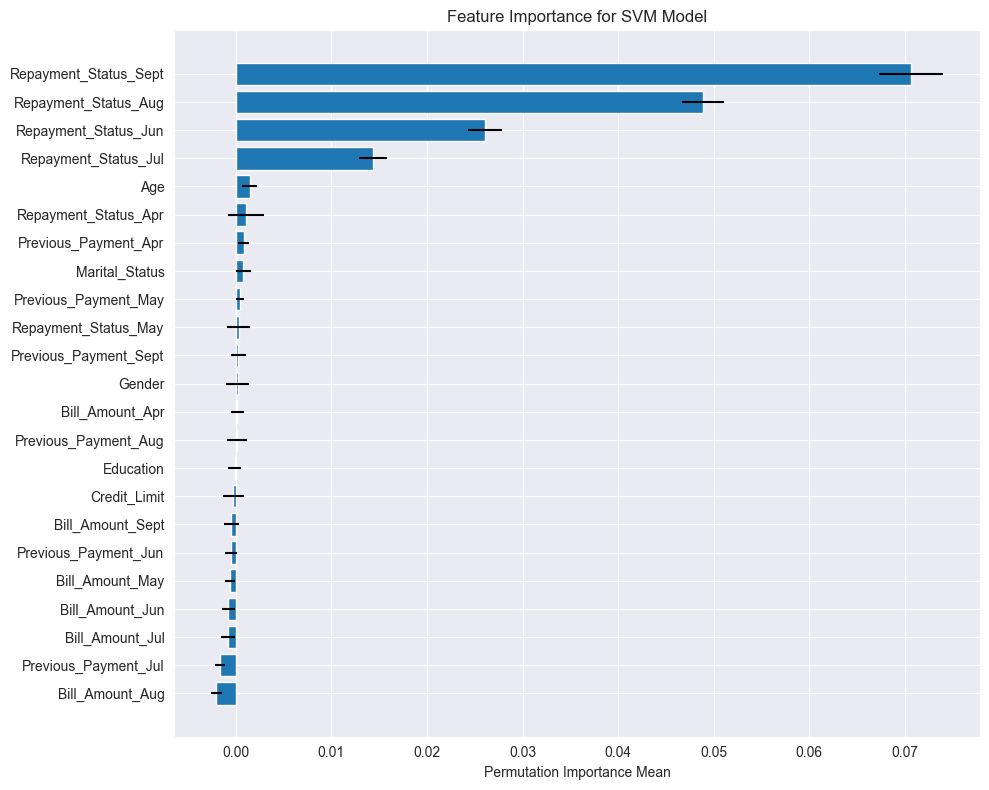

In [96]:
# Sort the data by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by='Importance_Mean', ascending=True
)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance_Mean'],
    xerr=feature_importance_df['Importance_Std'],
)
plt.xlabel('Permutation Importance Mean')
plt.title('Feature Importance for SVM Model')
plt.tight_layout()
plt.savefig('feature_importance_plot.png')
plt.show()

# Evaluation

The trained model is evaluated to assess its performance based on the business objective.

Metrics: The evaluation focuses on metrics such as precision, recall, and F1-score, which are especially important for imbalanced datasets. Accuracy is also measured for both training and testing datasets.

Final Decision: The evaluation results show that a balanced SVM model achieves a precision of 0.495, a recall of 0.559, and an F1-score of 0.525, making it the final selected model.

The most influential features in predicting credit card default are related to the repayment status in recent months.

Most Important Features: The top three most important features are the client's repayment status in September (Repayment_Status_Sept), August (Repayment_Status_Aug), and June (Repayment_Status_Jun). This indicates that recent payment behavior is the most critical factor for the model's decision-making.

Least Important Features: The features with the least influence on the model's predictions include Previous_Payment_Aug, Bill_Amount_Apr, and Gender. The importance scores for these features are very close to zero, suggesting they do not significantly impact the model's ability to predict default.

# Deployment

In [97]:
import joblib

# Read data file
data = pd.read_csv('data/credit_card_cleaned.csv')
# Define features (X) and target (y)
X = data.drop('Default_Payment', axis=1)
y = data['Default_Payment']

# Create a preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create the final model pipeline
# This pipeline includes both preprocessing and the SVM classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Save the trained pipeline for deployment
joblib.dump(pipeline, 'svm_pipeline.pkl')

print("Pipeline training and saving complete. The 'svm_pipeline.pkl' file is ready for deployment.")

Pipeline training and saving complete. The 'svm_pipeline.pkl' file is ready for deployment.
